In [6]:
# %load_ext autoreload
# %autoreload 2

import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import anndata
import sys

import logging
from datetime import datetime
import modified_celloracle as mco
import CellOracleSetup as setup_module
import GRNClusterAnalysis as analysis_module
import GRNInference as inference_module

log_dir = 'logs'
os.makedirs(log_dir, exist_ok=True)
log_filename = os.path.join(log_dir, f"app_{datetime.now().strftime('%Y_%m_%d')}.log")

# Configure the basic logging
logging.basicConfig(
    filename=log_filename,
    filemode='a',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
#all custom Data dirs
Gen_Data_Dir =  '../../celloracle_data'
OG_Files_Data_Dir = os.path.join(Gen_Data_Dir, 'og_files')
Base_GRN_Nec_Files_Dir = os.path.join(Gen_Data_Dir, 'files_for_basegrn_creation')
Base_GRN_Dir = os.path.join(Gen_Data_Dir, 'base_grn')
Base_Clustering_Data = os.path.join(Gen_Data_Dir, 'clustering_data')
Final_SCRNA_Data_Dir = os.path.join(Gen_Data_Dir, 'scrna_final_celloc')


#celloracle package dirs
Gen_CellOracle_Package_Dir = '../../modified_CellOracle'
Gen_CellOracle_Package_Data_Dir = os.path.join(Gen_CellOracle_Package_Dir, 'modified_celloracle/data')
Gen_CellOracle_Package_Base_GRN_Data_Dir = os.path.join(Gen_CellOracle_Package_Data_Dir, 'promoter_base_GRN')

#celloracleobject dirs
CellOracle_Object_Dir_Actual = os.path.join(Gen_Data_Dir, 'celloracle_object/actual')
CellOracle_Object_Dir_Example = os.path.join(Gen_Data_Dir, 'celloracle_object/example')
CellOracle_Object_Dir_Prev = os.path.join(Gen_Data_Dir, 'celloracle_object/prev')


In [9]:
os.chdir('../../complete_project/../')

sys.path.append("/home/caspar/thesis_code/CellOracle")
sys.path.append("/home/caspar/thesis_code/complete_project/py files")

import PickleOracleModel as pickle_module


In [3]:
trained_cellOc_object = mco.load_hdf5(os.path.join(CellOracle_Object_Dir_Prev, "cellOC.celloracle.oracle"))
trained_links_object = mco.load_hdf5(os.path.join(CellOracle_Object_Dir_Prev, "filtered_links.celloracle.links"))


2025-01-29 14:56:50,915 - INFO - Analysis object created, performing anaylsis


['(early) Somite', '(pre)Somitic/Wavefront', 'Cardiac Mesoderm', 'Cardiomyocytes', 'Caudal Epiblast', 'Caudal Mesoderm', 'Dermomyotome', 'Early Motor Neurons', 'Endothelium', 'Epiblast', 'Epidermis Progenitors', 'Erythrocytes', 'ExE Endoderm', 'Floor Plate Neural Tube', 'LP/Intermediate Mesoderm', 'Late Motor Neurons', 'Megakaryocytes', 'Myotome', 'NMPs', 'Naive PGCs', 'Nascent Mesoderm', 'Neural Progenitors', 'PGCs', 'Parietal Endoderm', 'Pharyngeal Mesoderm', 'Primitive Streak', 'Reprogramming PGCs', 'Roof Plate Neural Tube', 'Sclerotome', 'Visceral Endoderm', 'mESCs']
(early) Somite


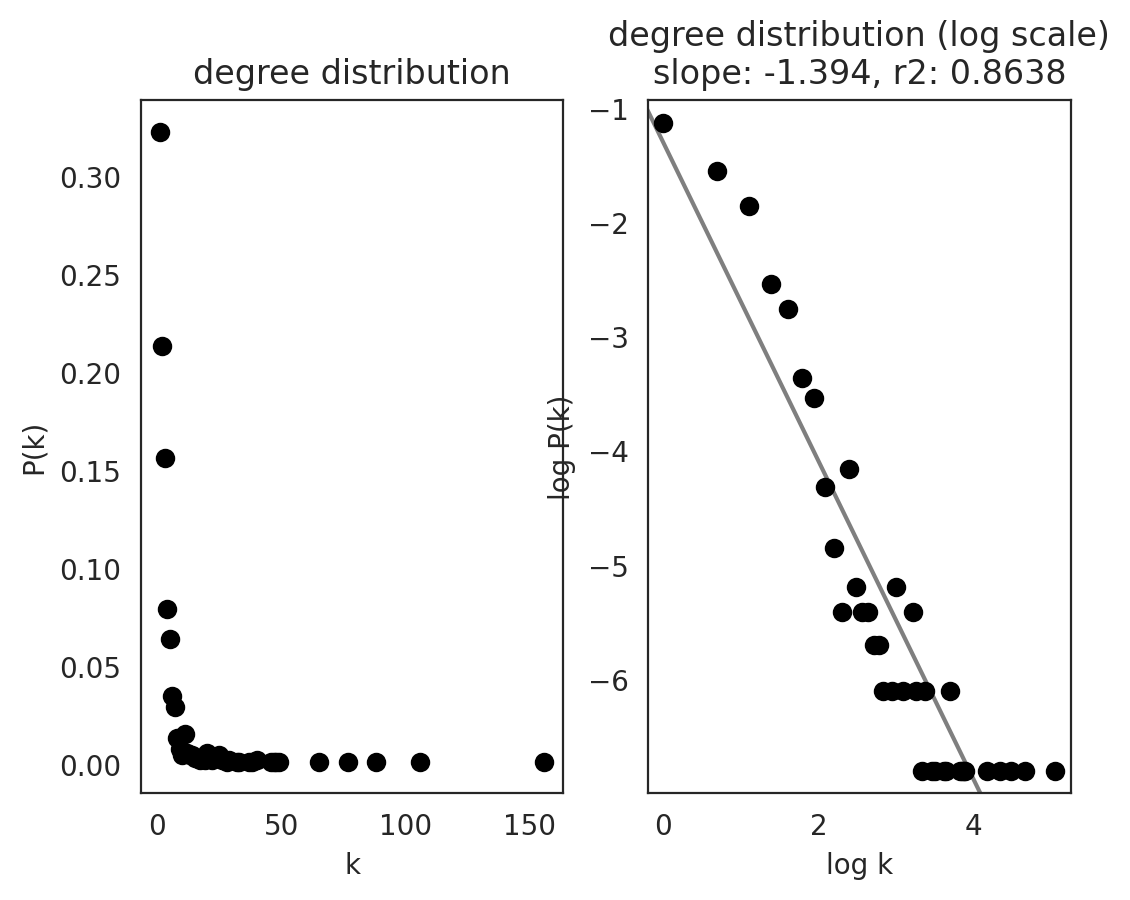

(pre)Somitic/Wavefront


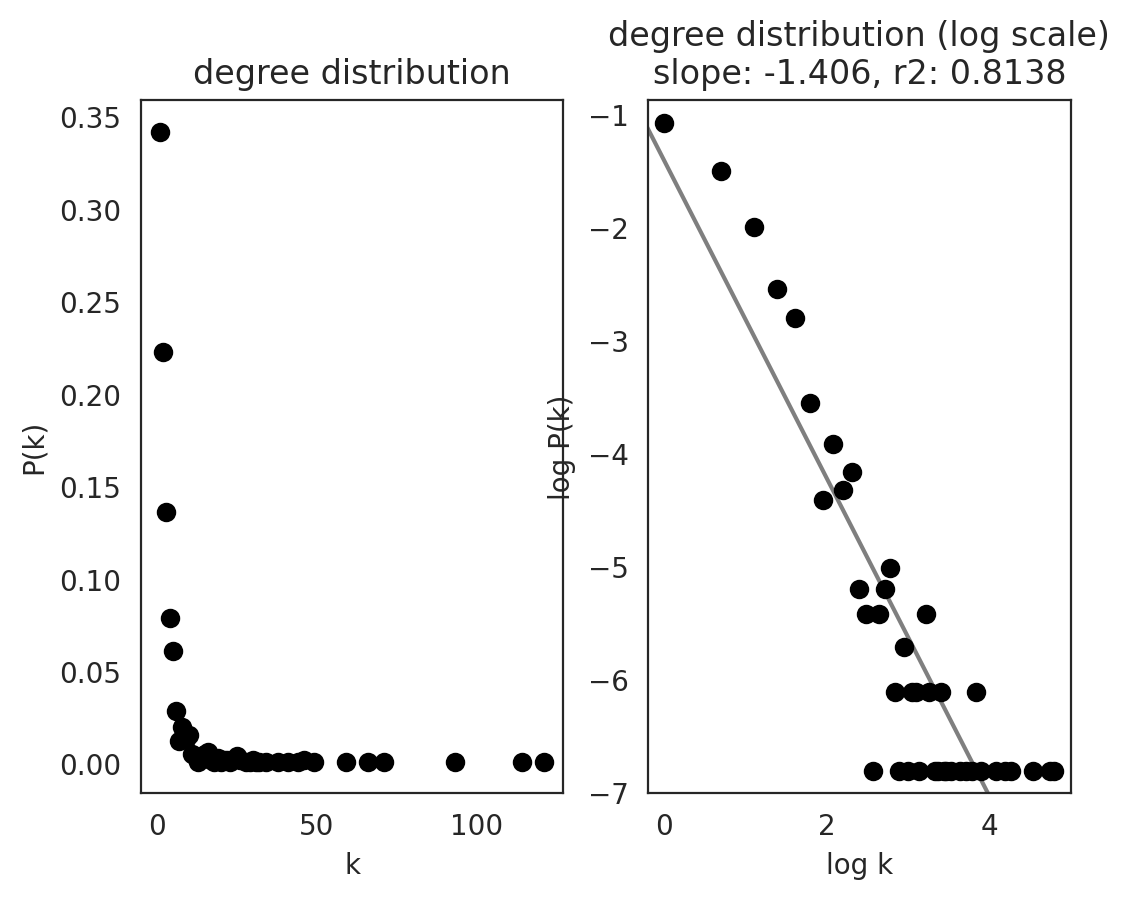

Cardiac Mesoderm


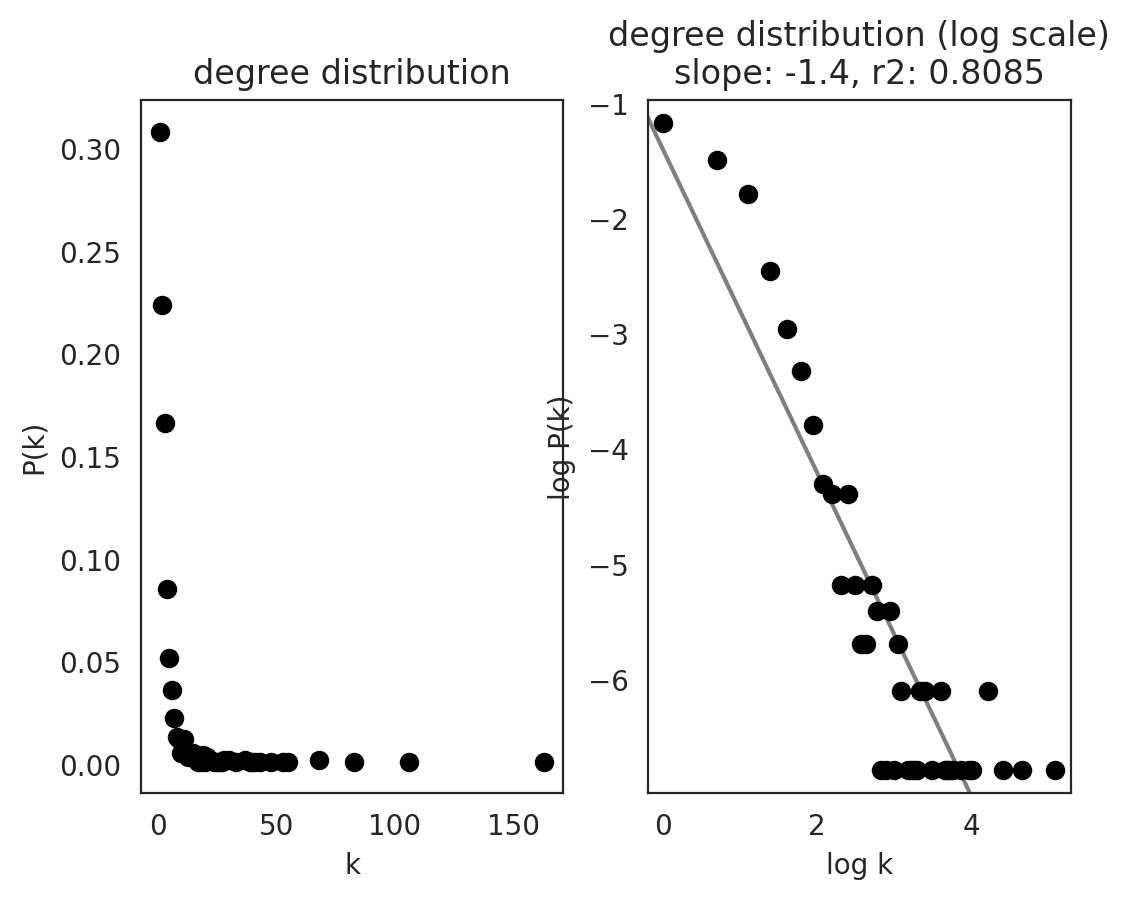

Cardiomyocytes


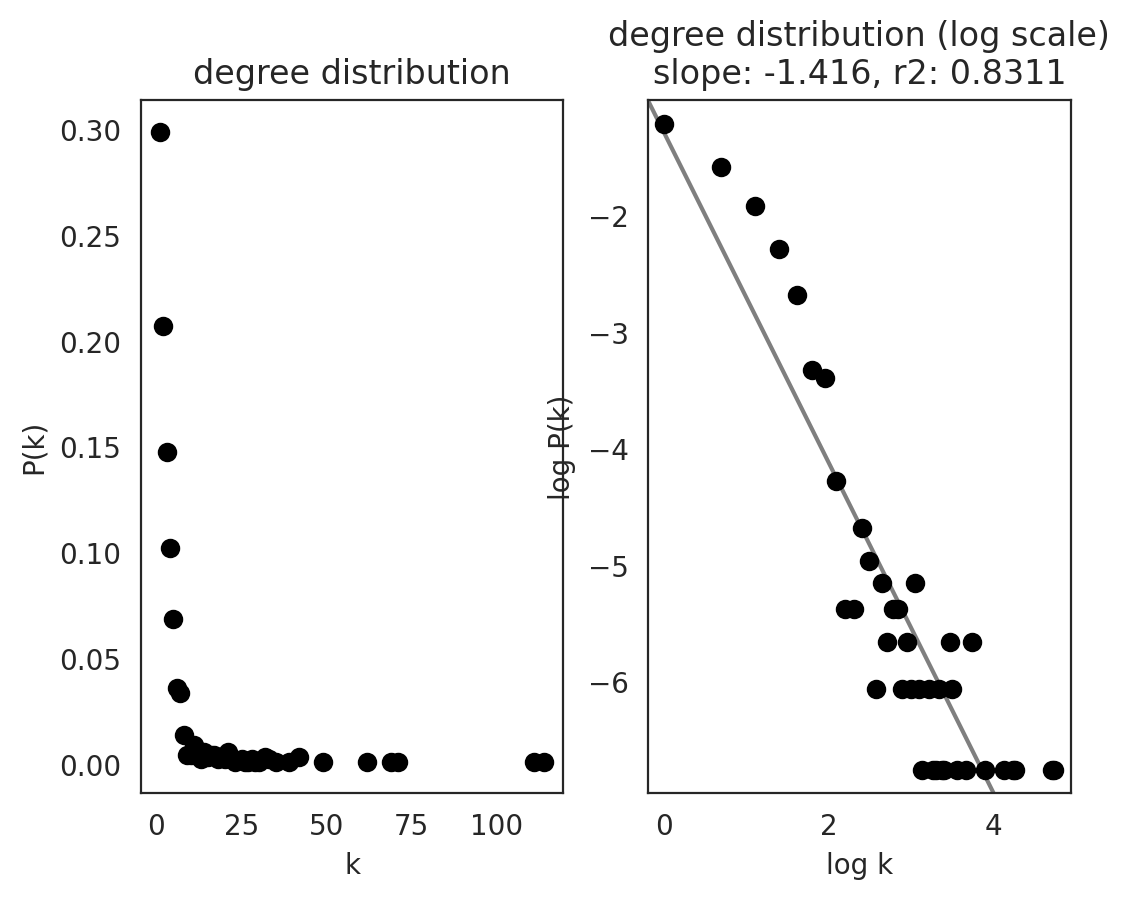

Caudal Epiblast


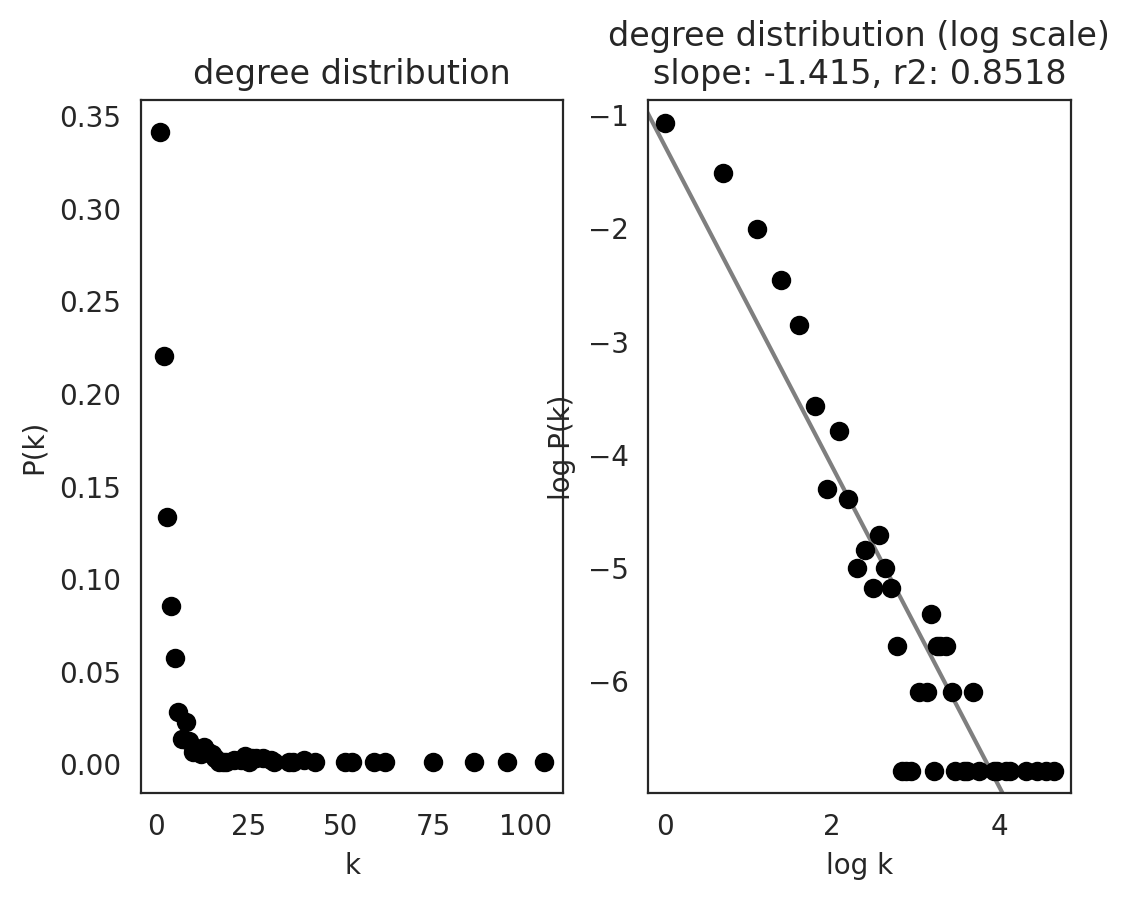

Caudal Mesoderm


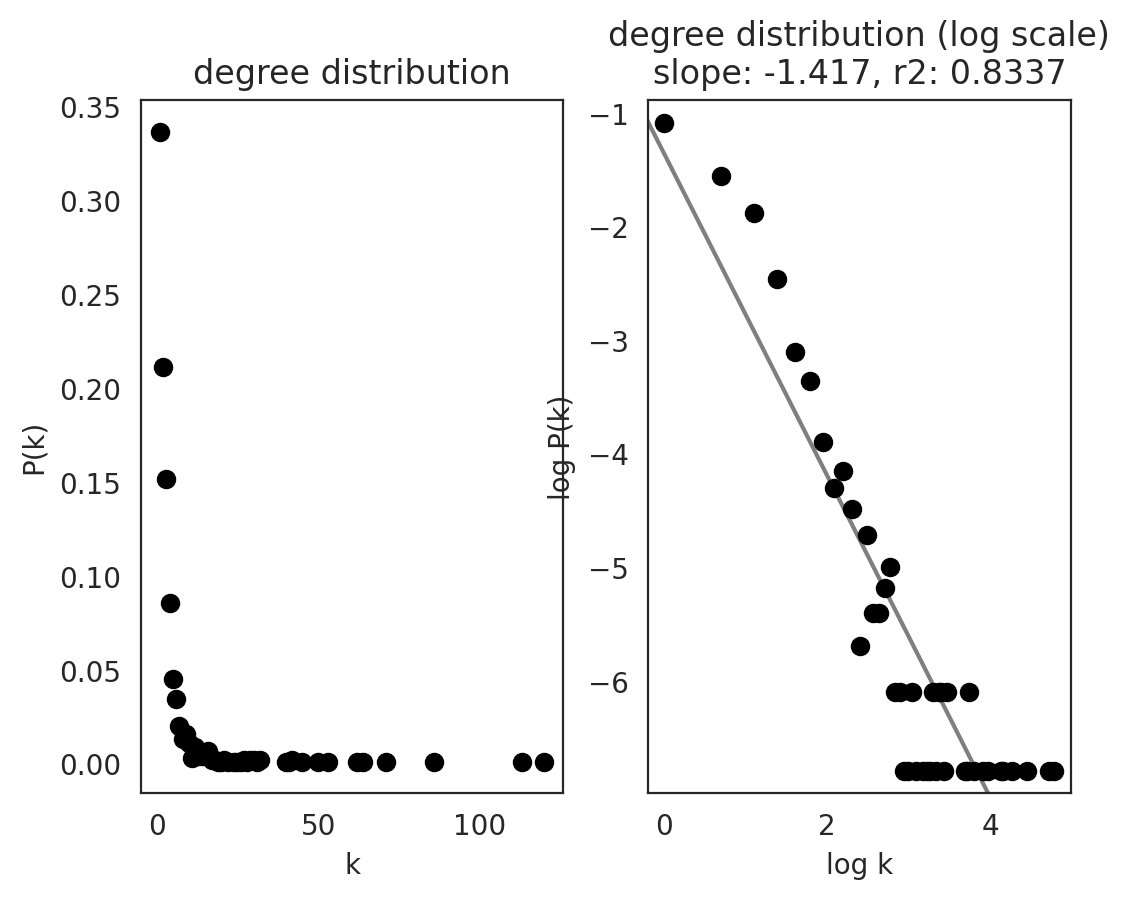

Dermomyotome


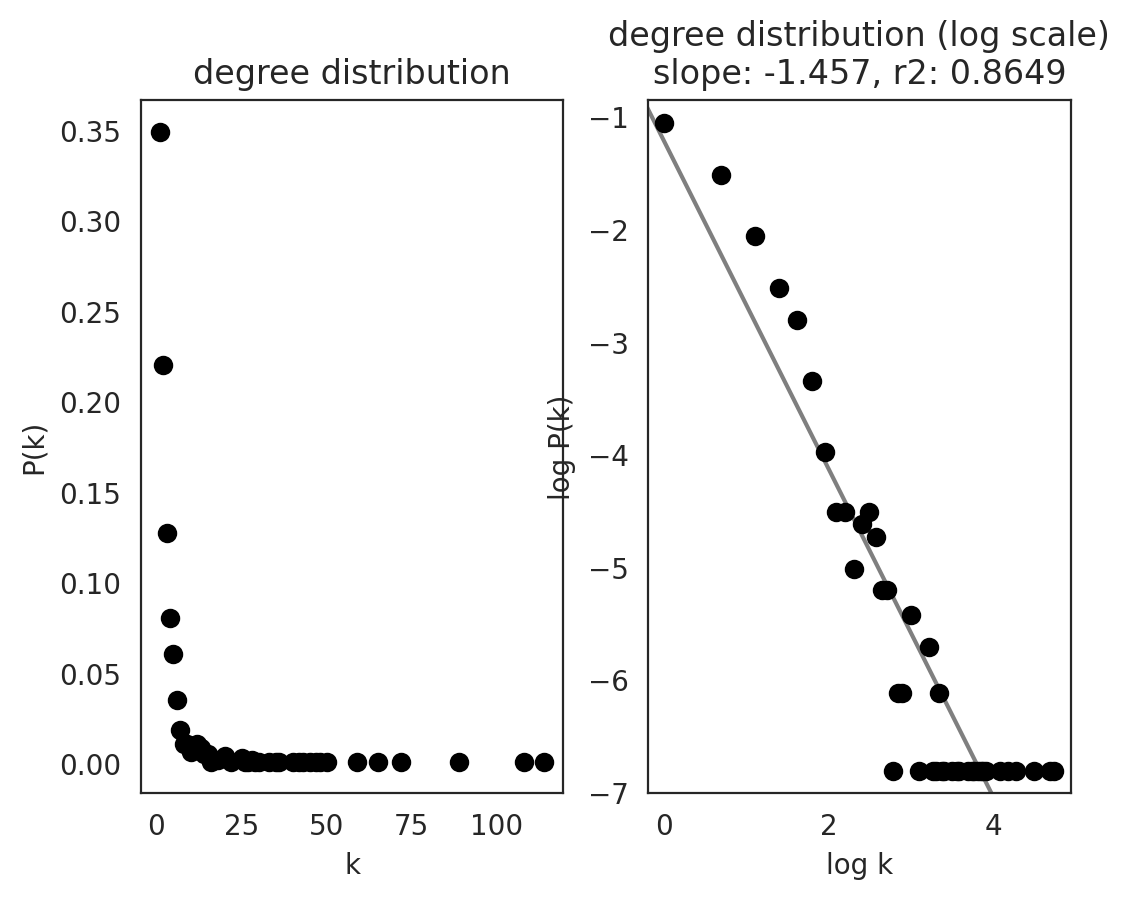

Early Motor Neurons


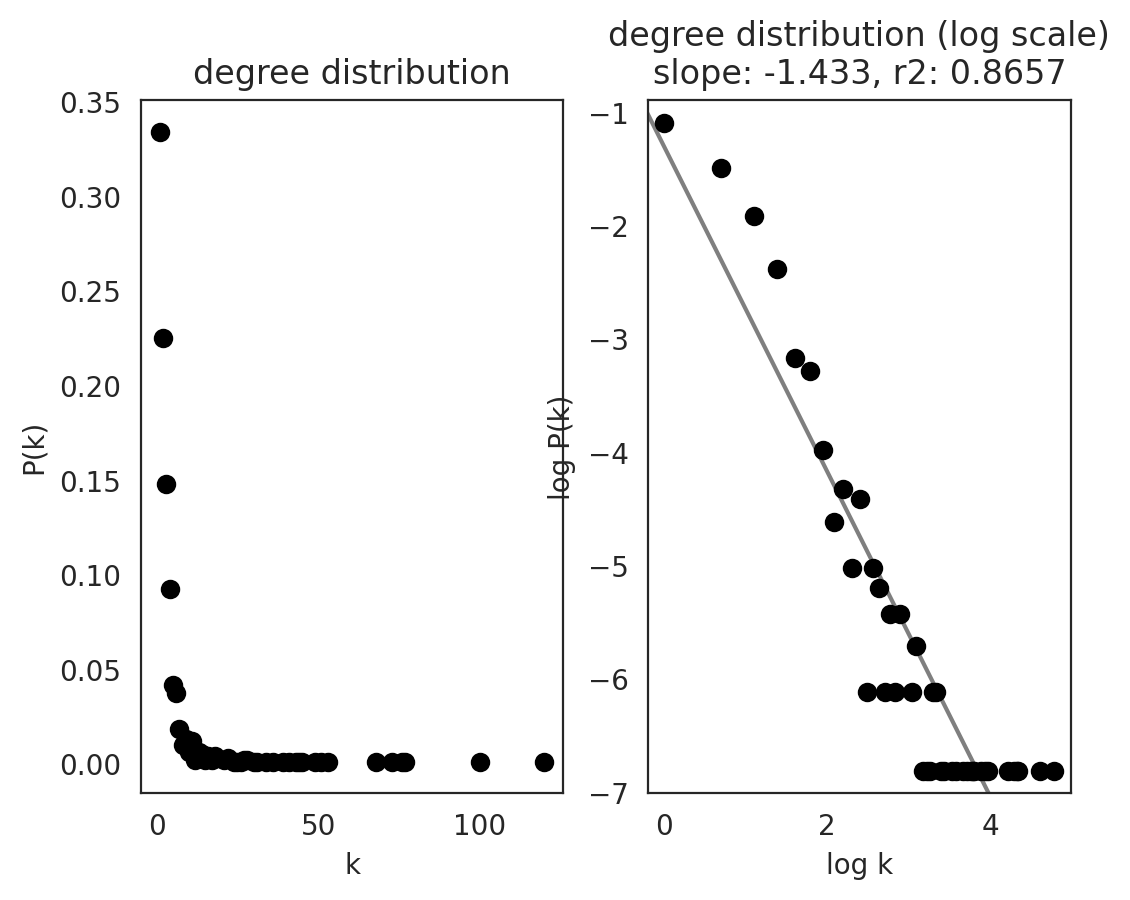

Endothelium


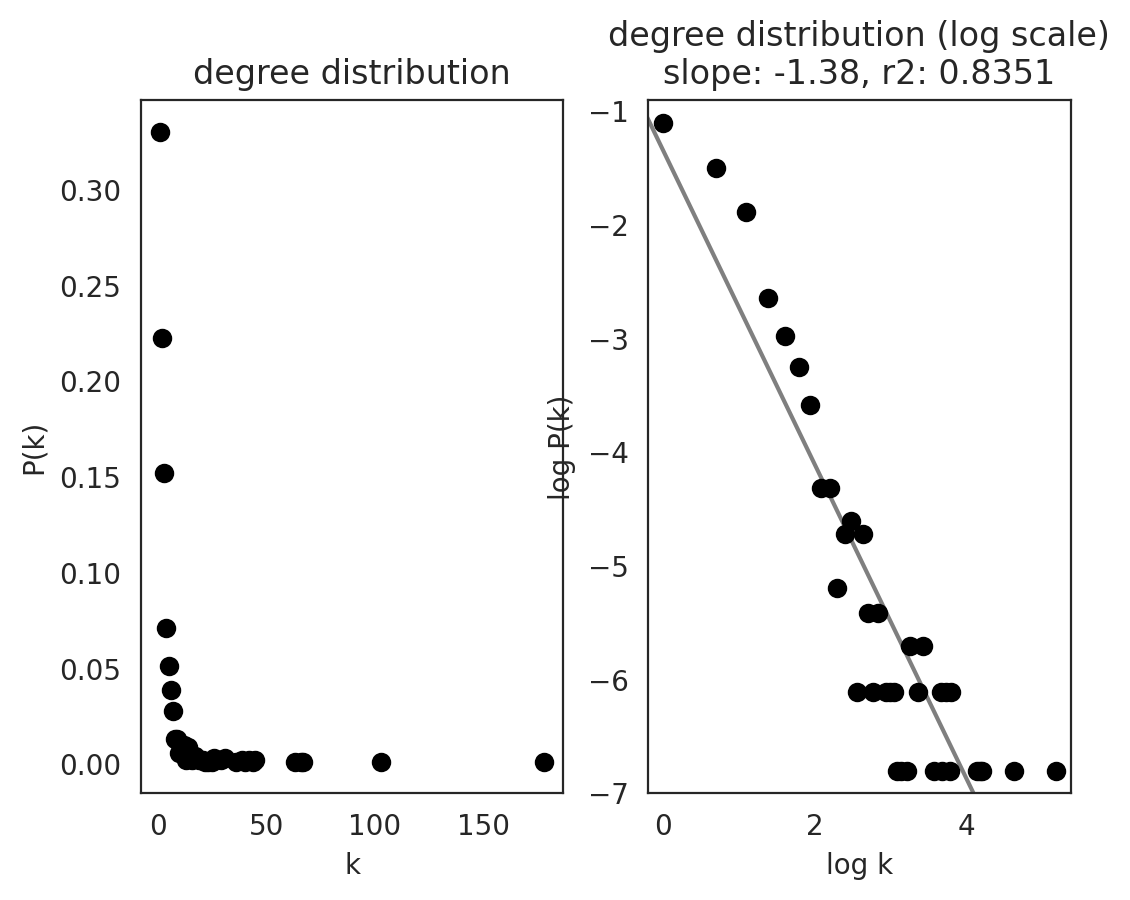

Epiblast


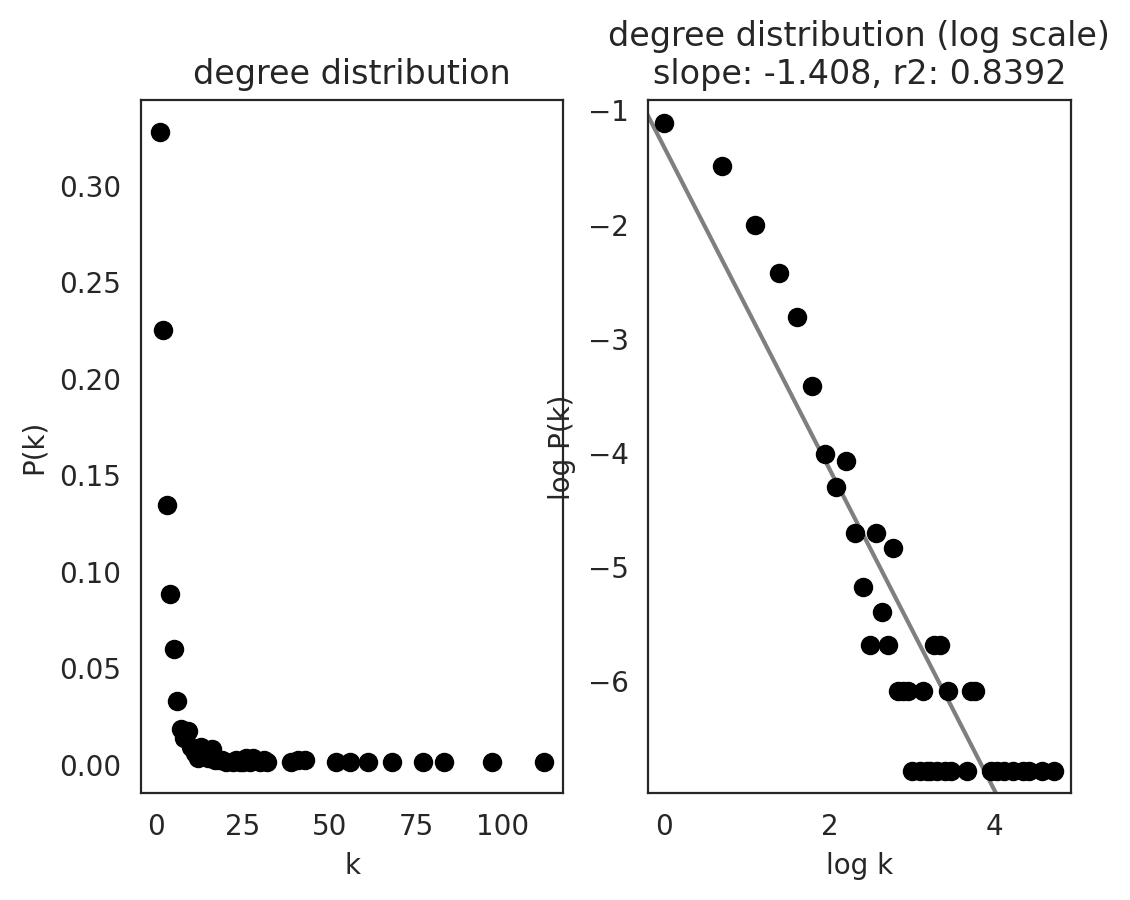

Epidermis Progenitors


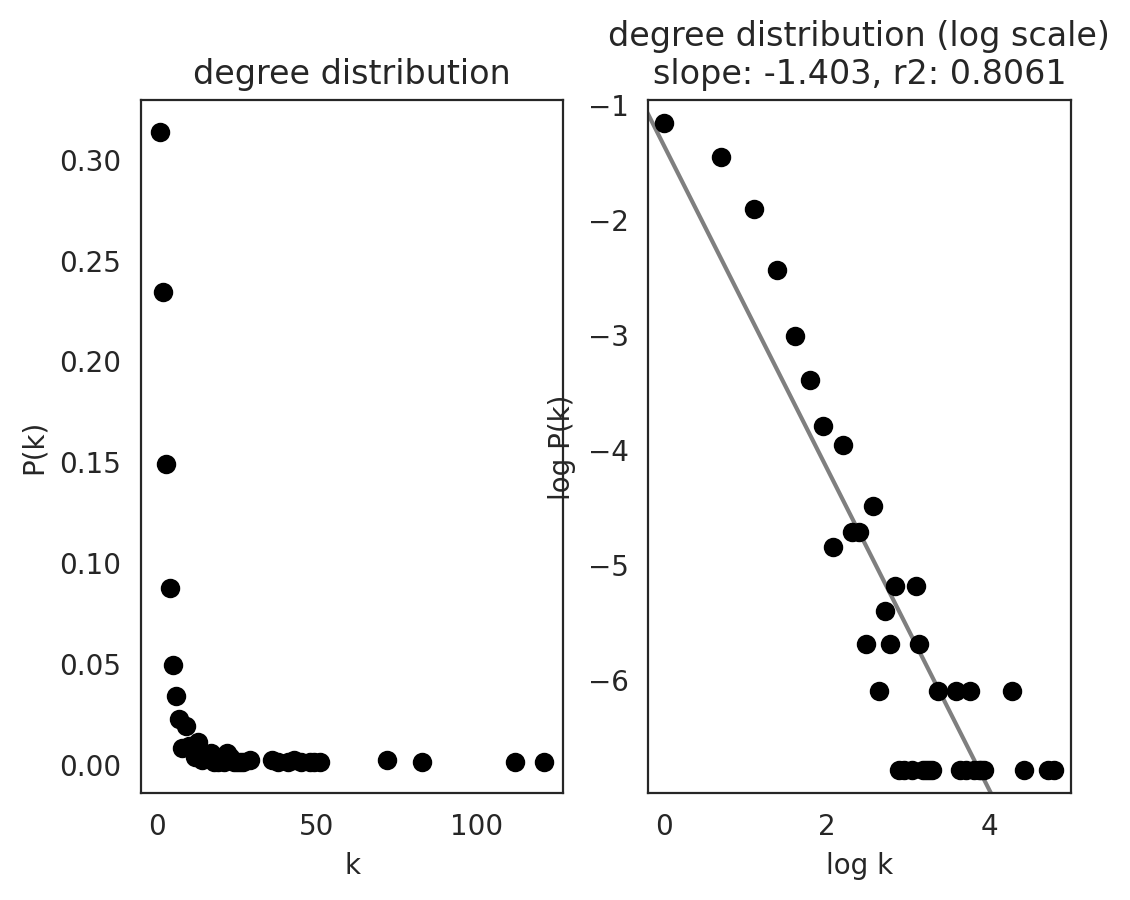

Erythrocytes


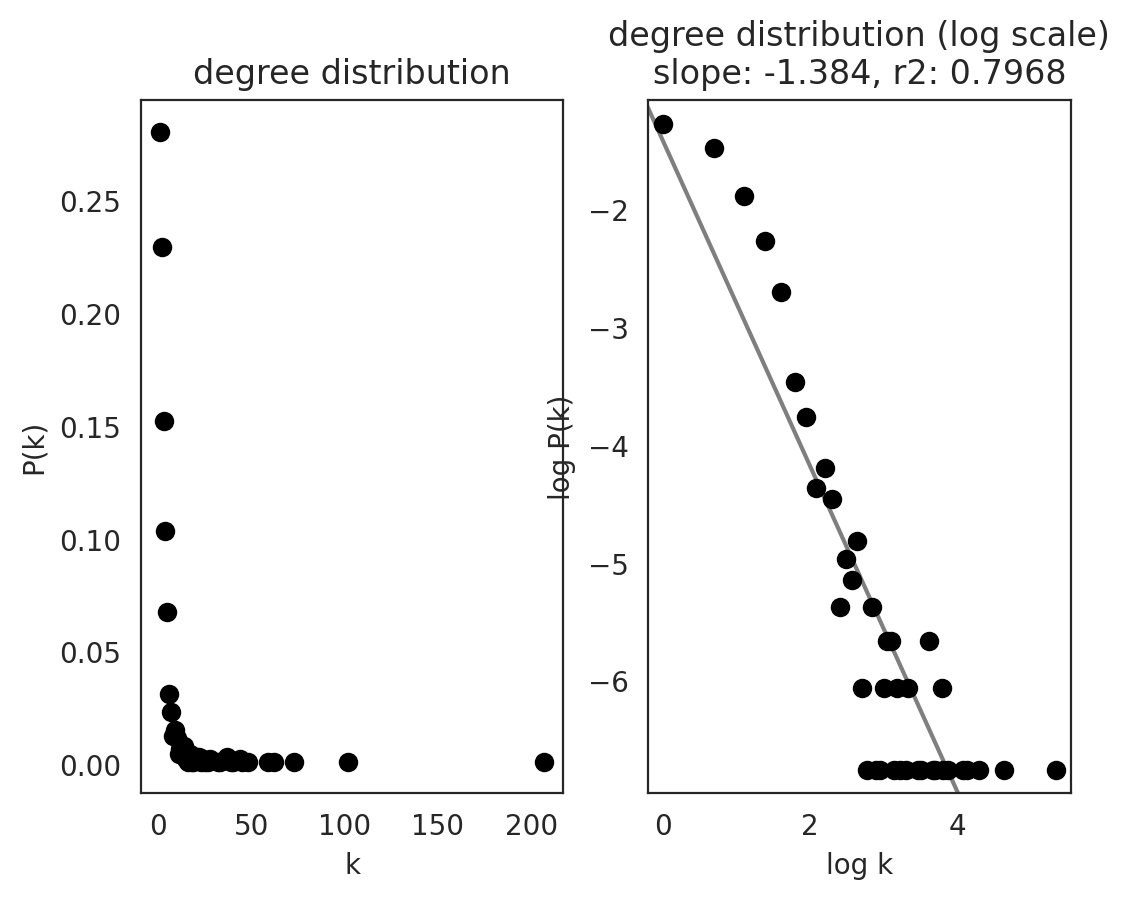

ExE Endoderm


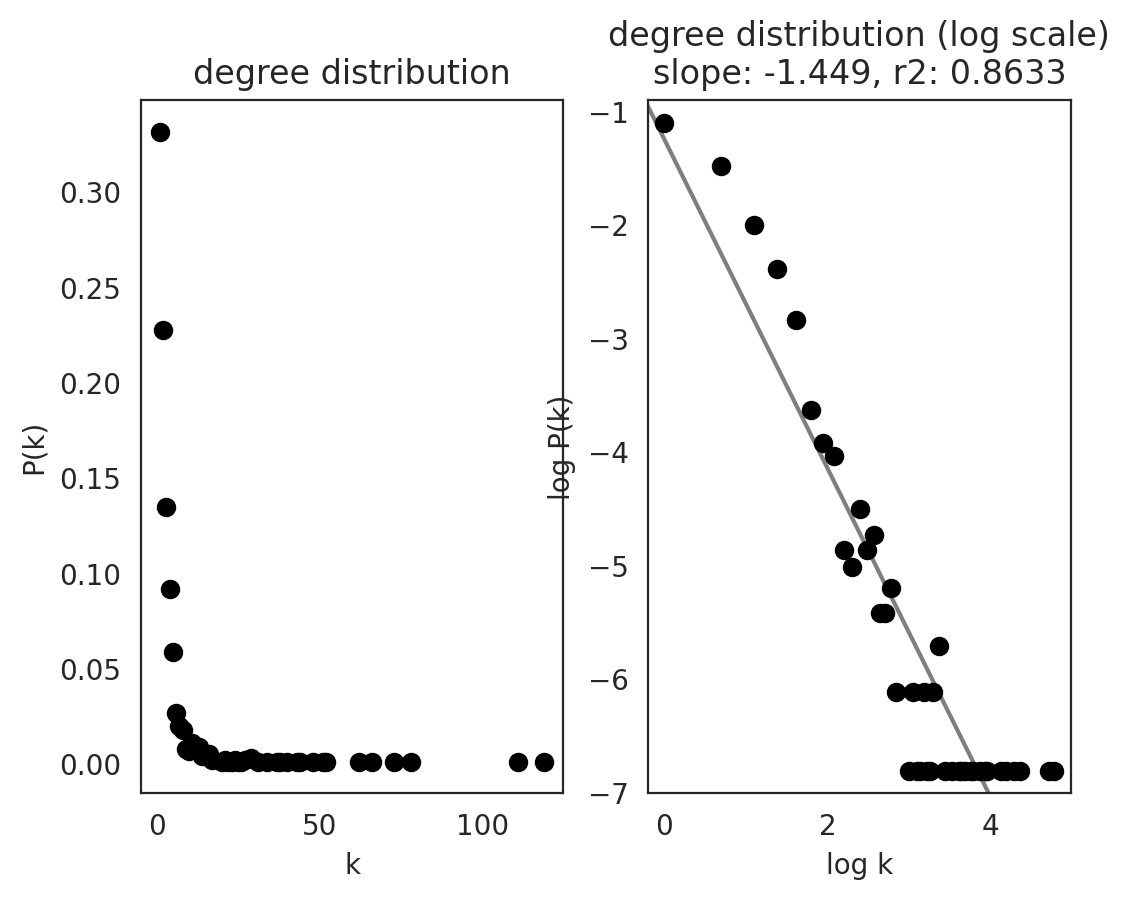

Floor Plate Neural Tube


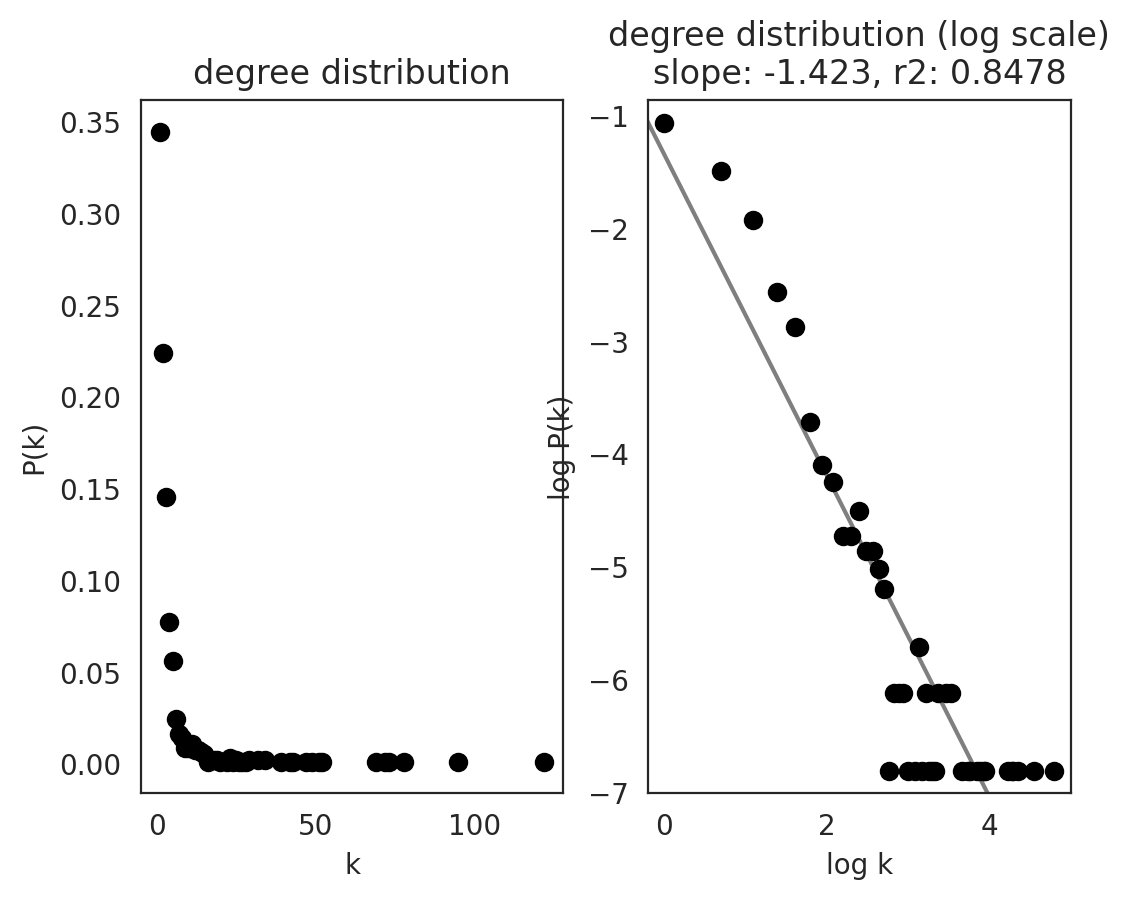

LP/Intermediate Mesoderm


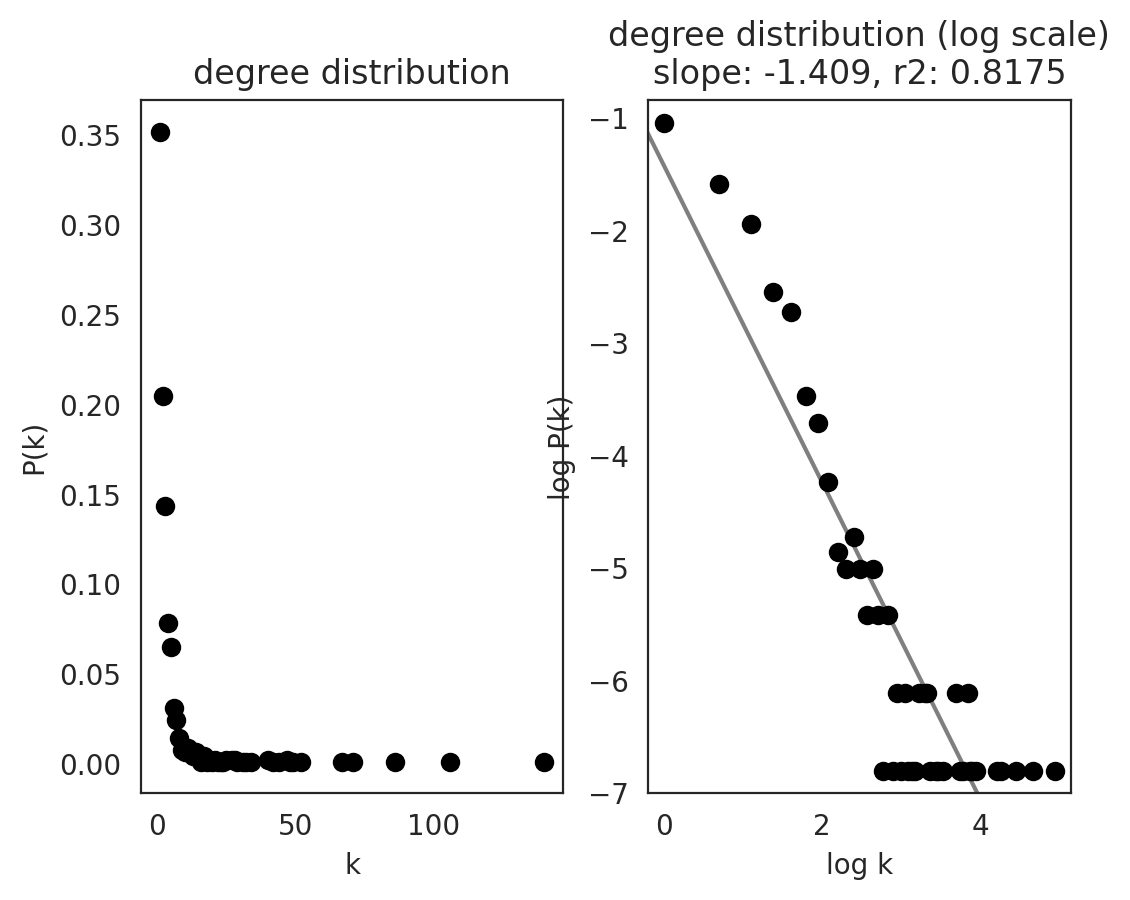

Late Motor Neurons


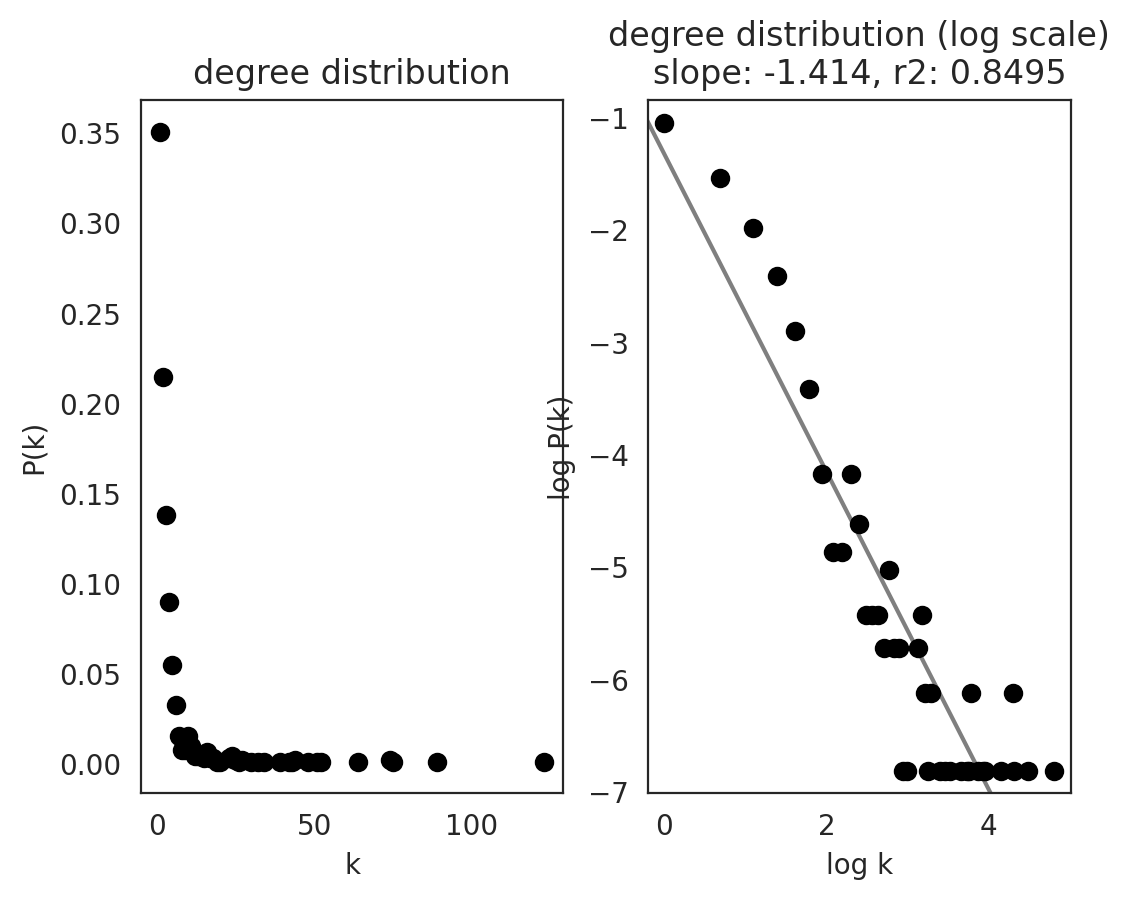

Megakaryocytes


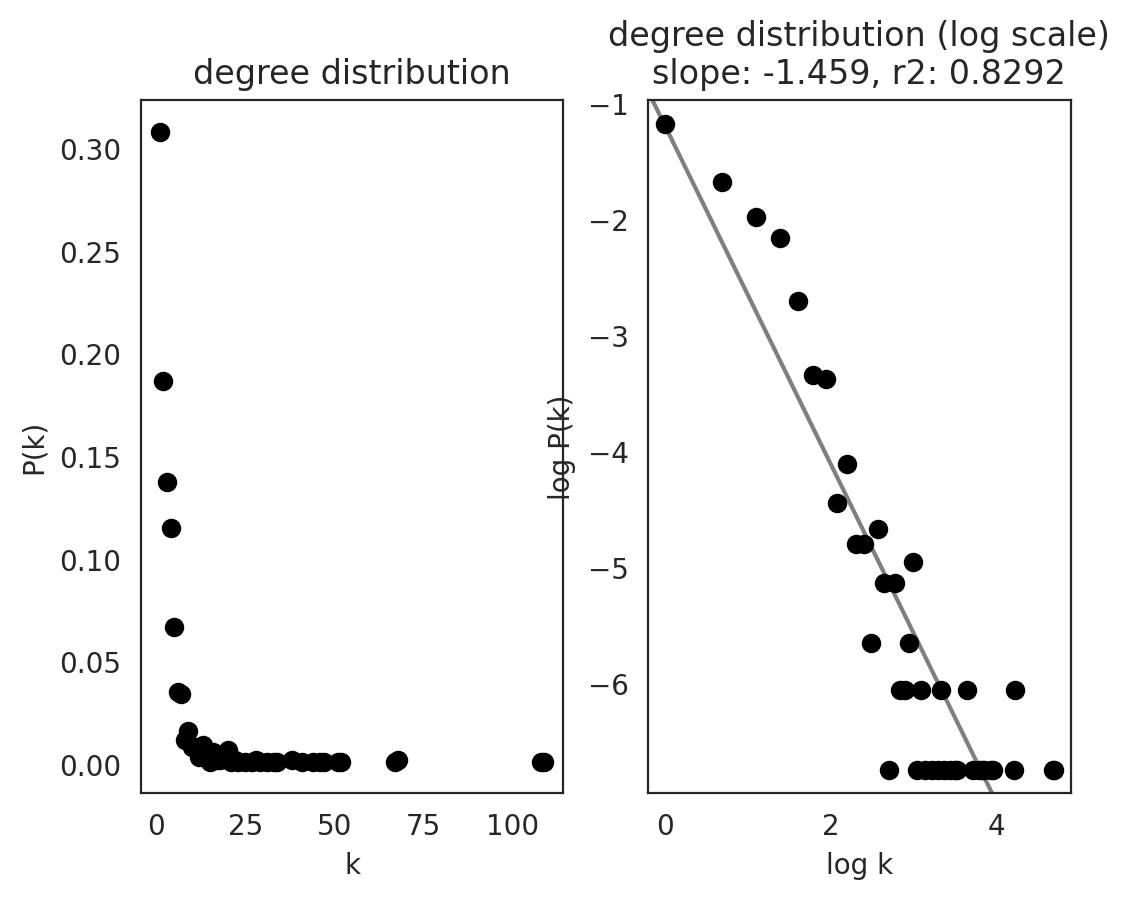

Myotome


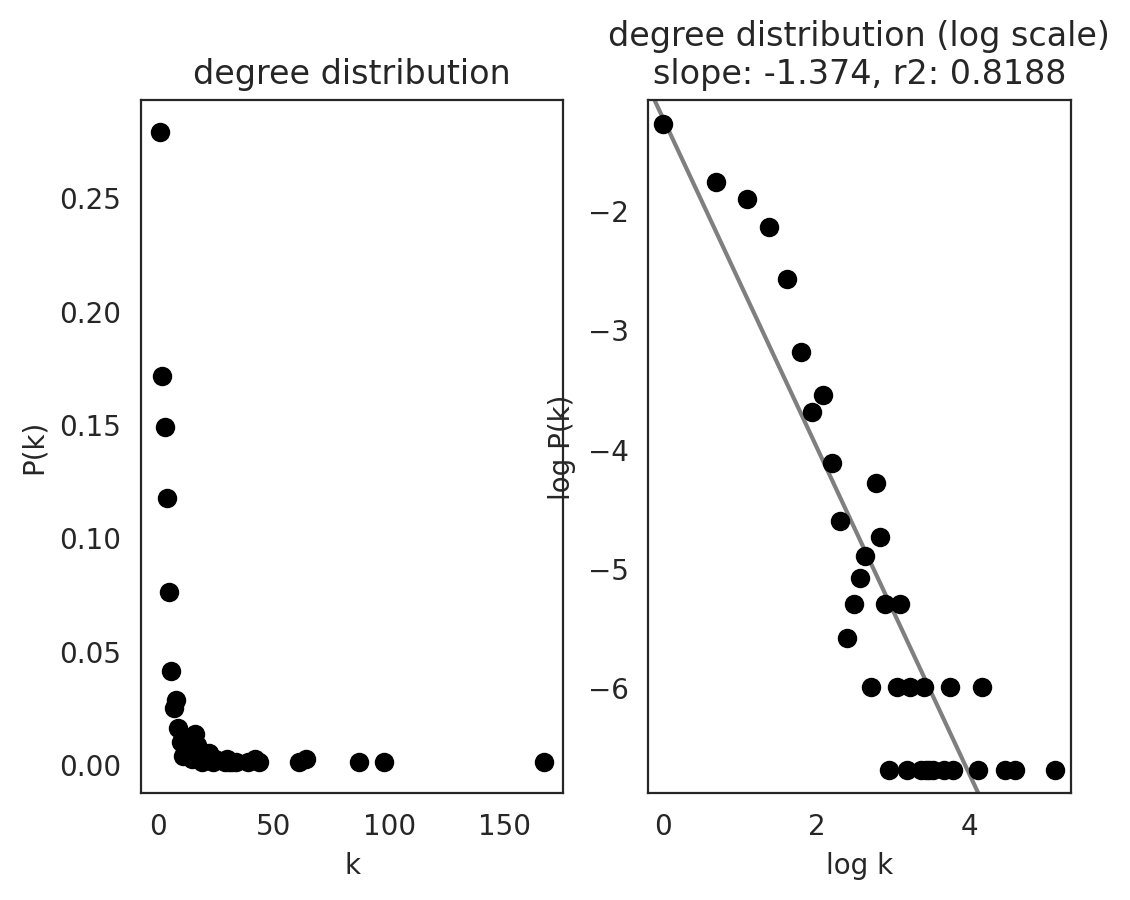

NMPs


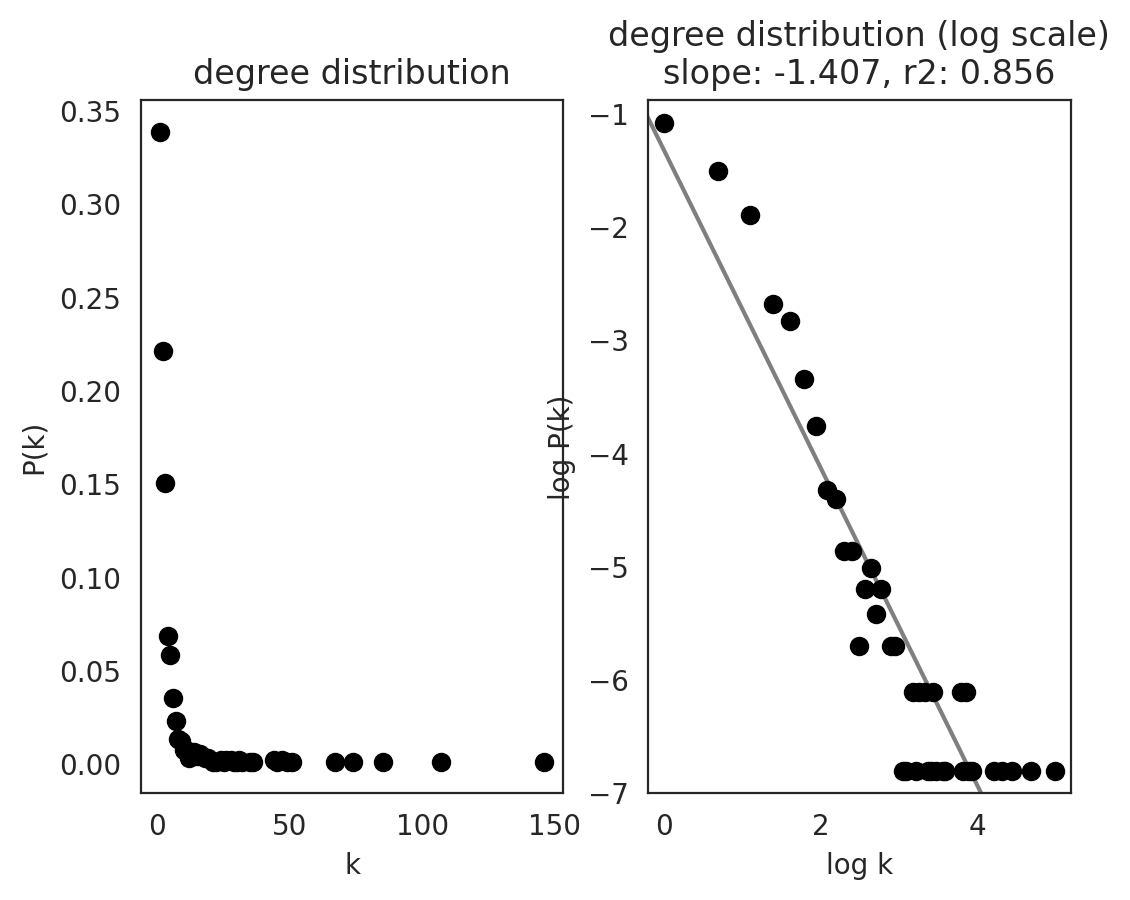

Naive PGCs


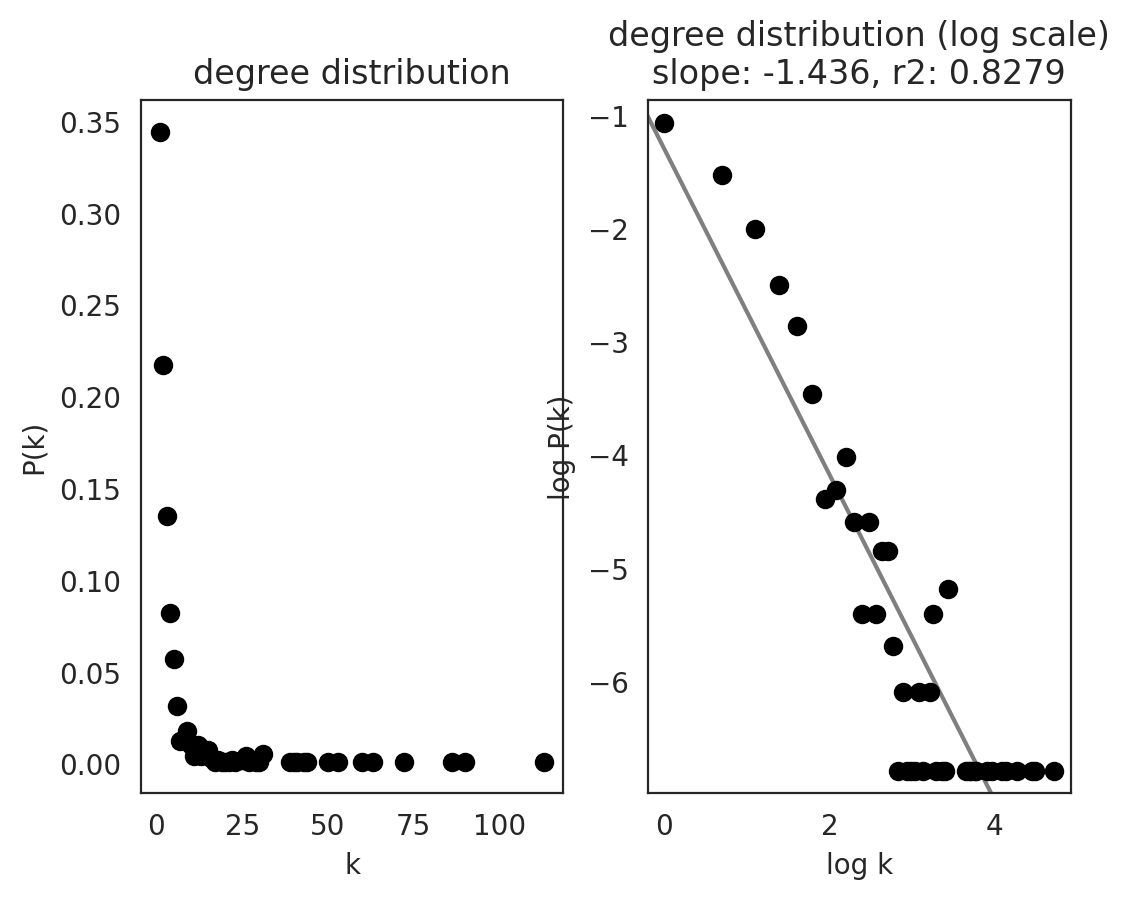

Nascent Mesoderm


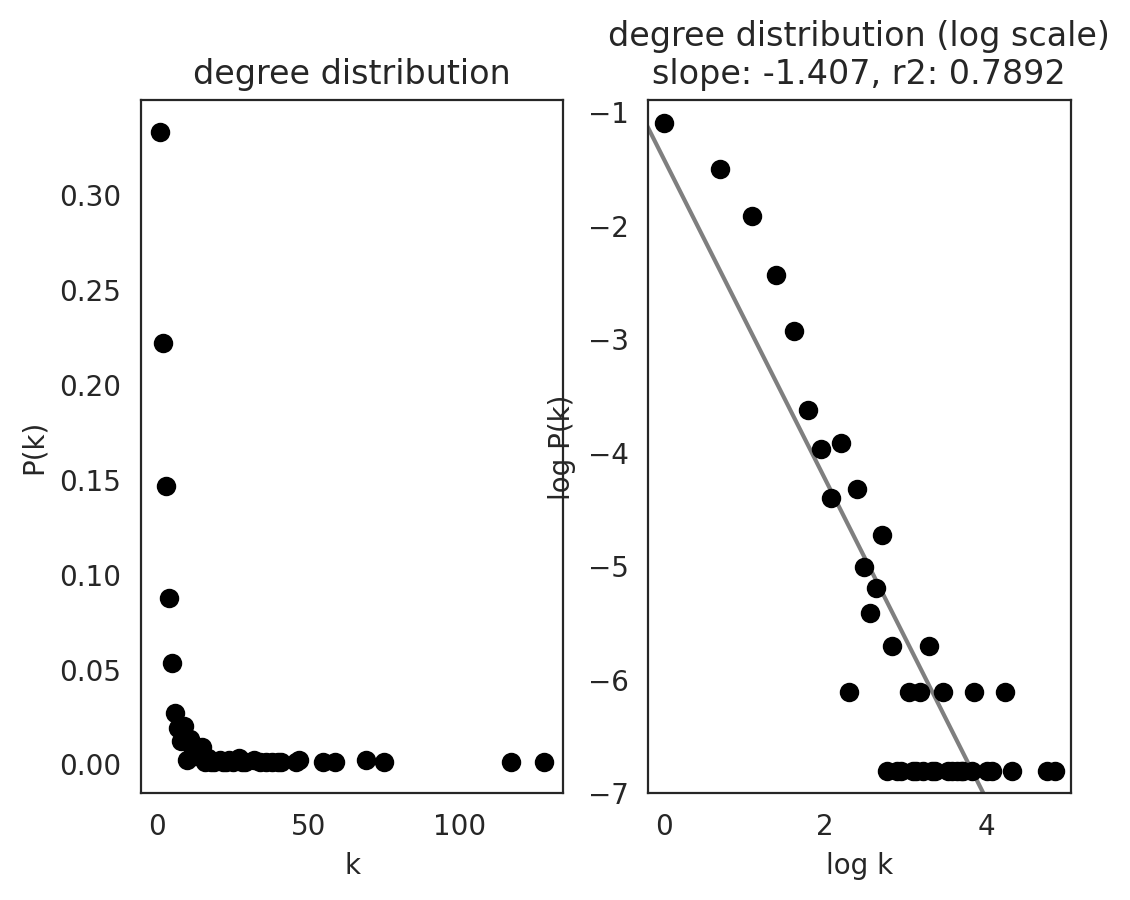

Neural Progenitors


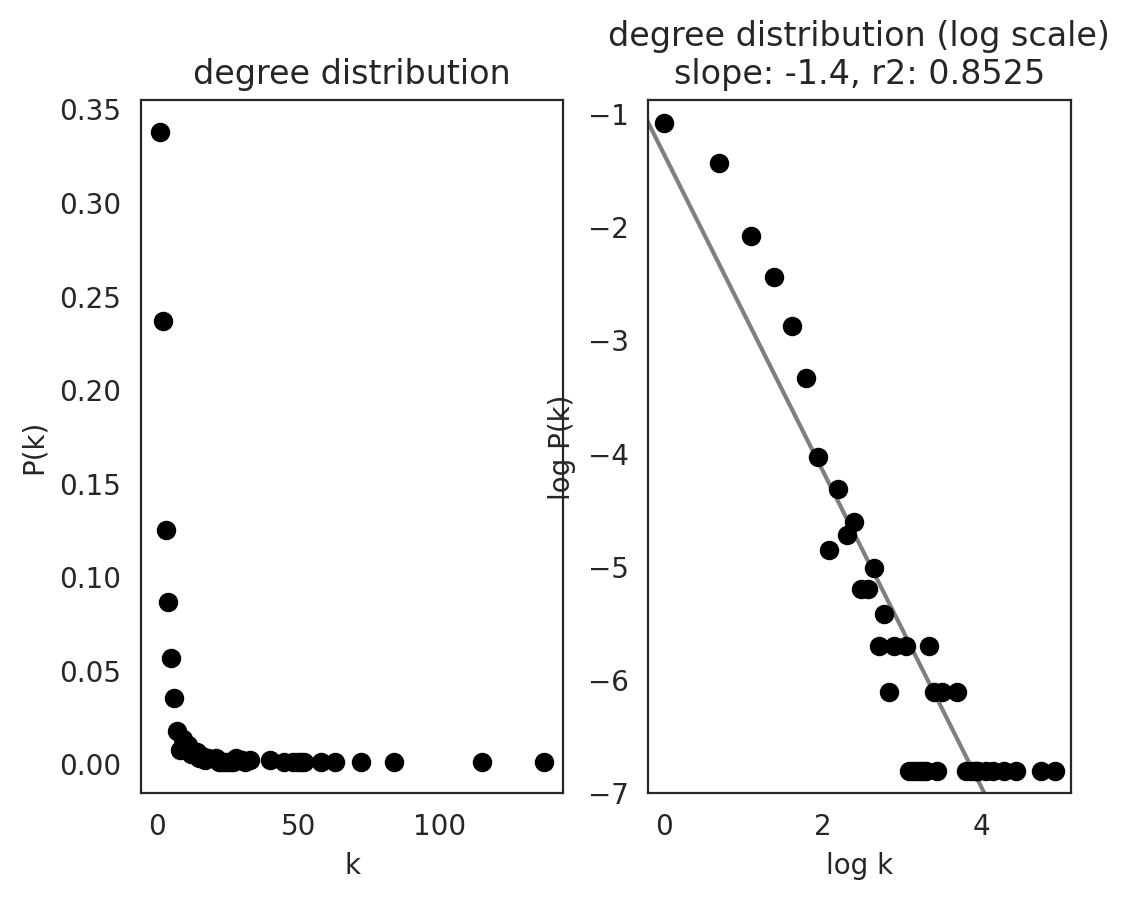

PGCs


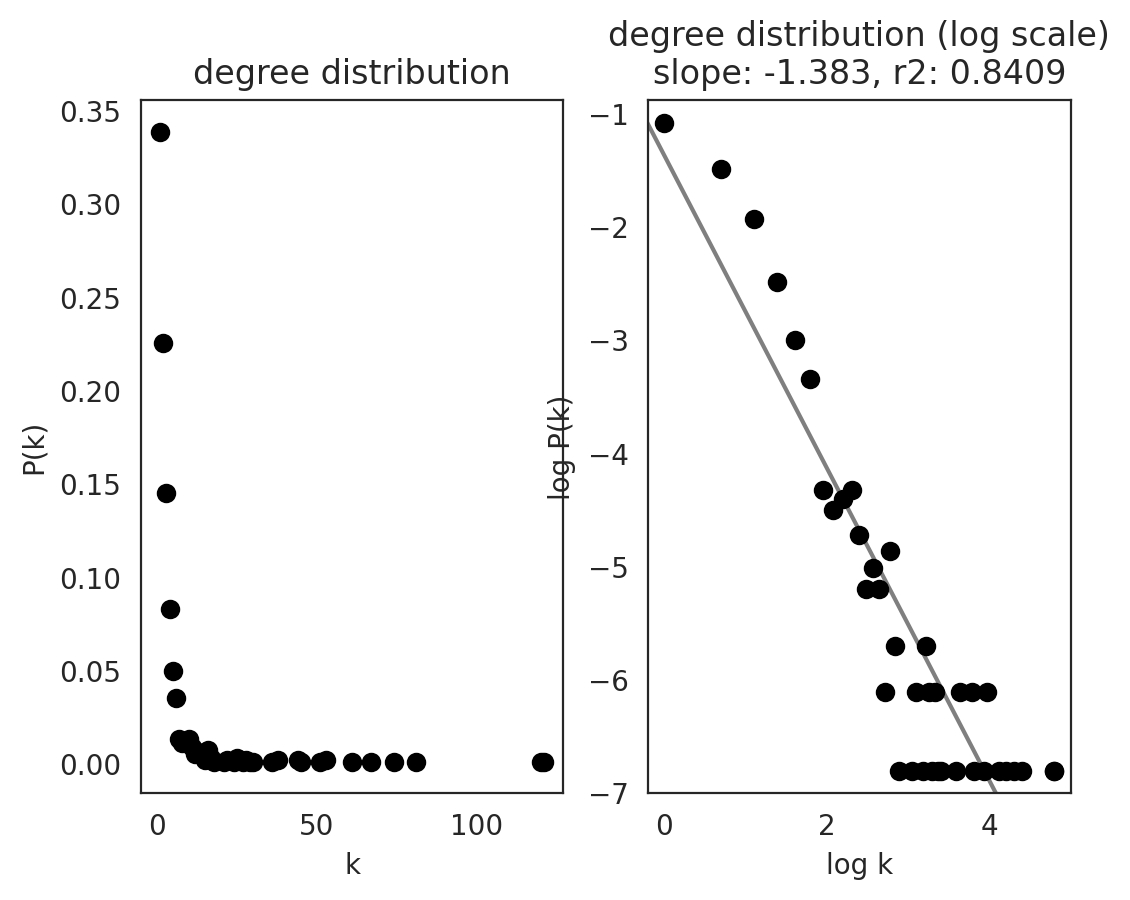

Parietal Endoderm


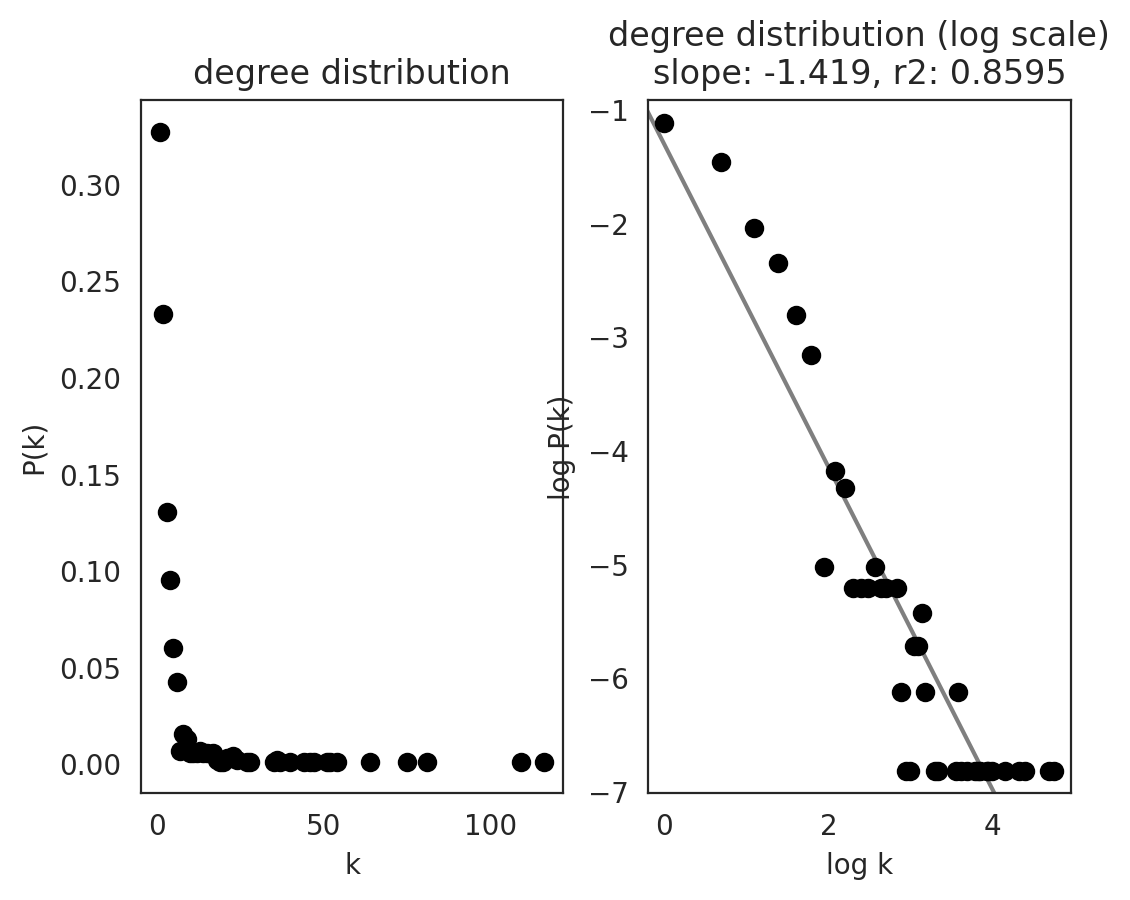

Pharyngeal Mesoderm


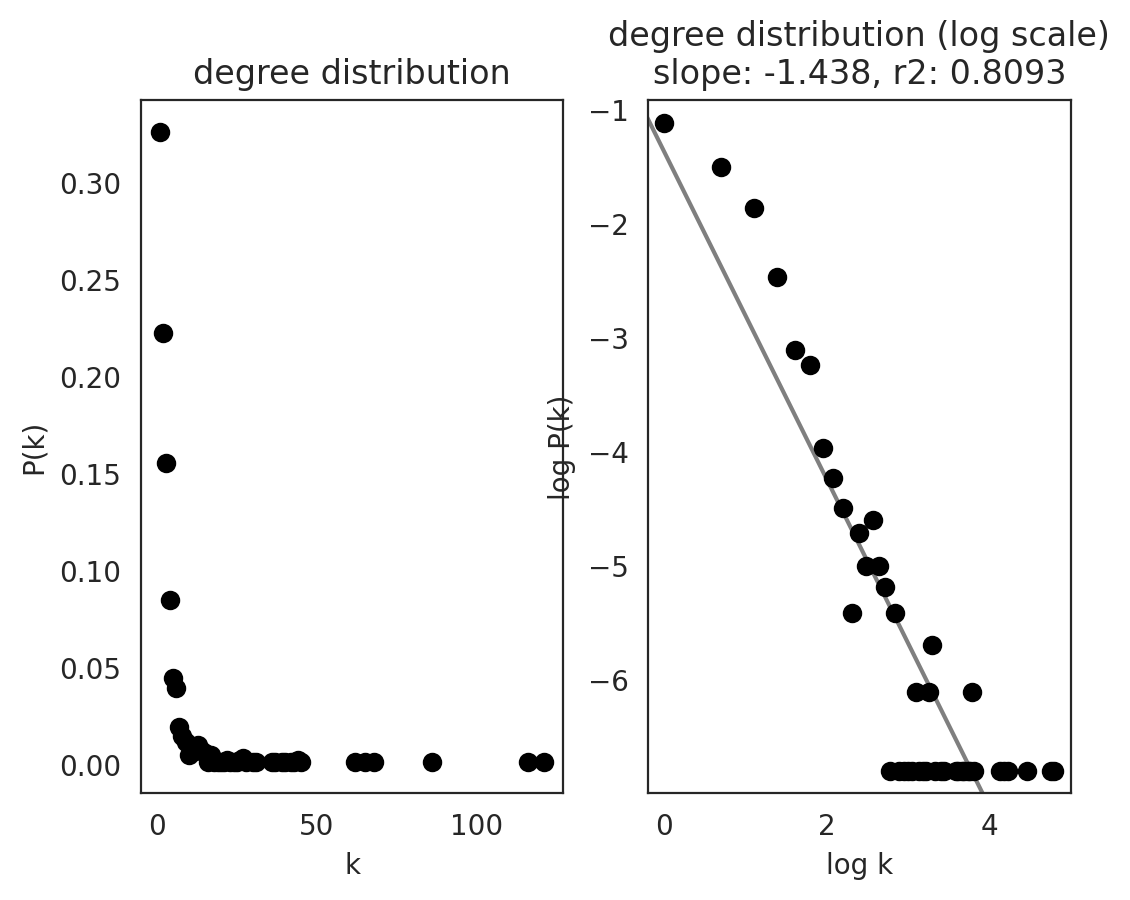

Primitive Streak


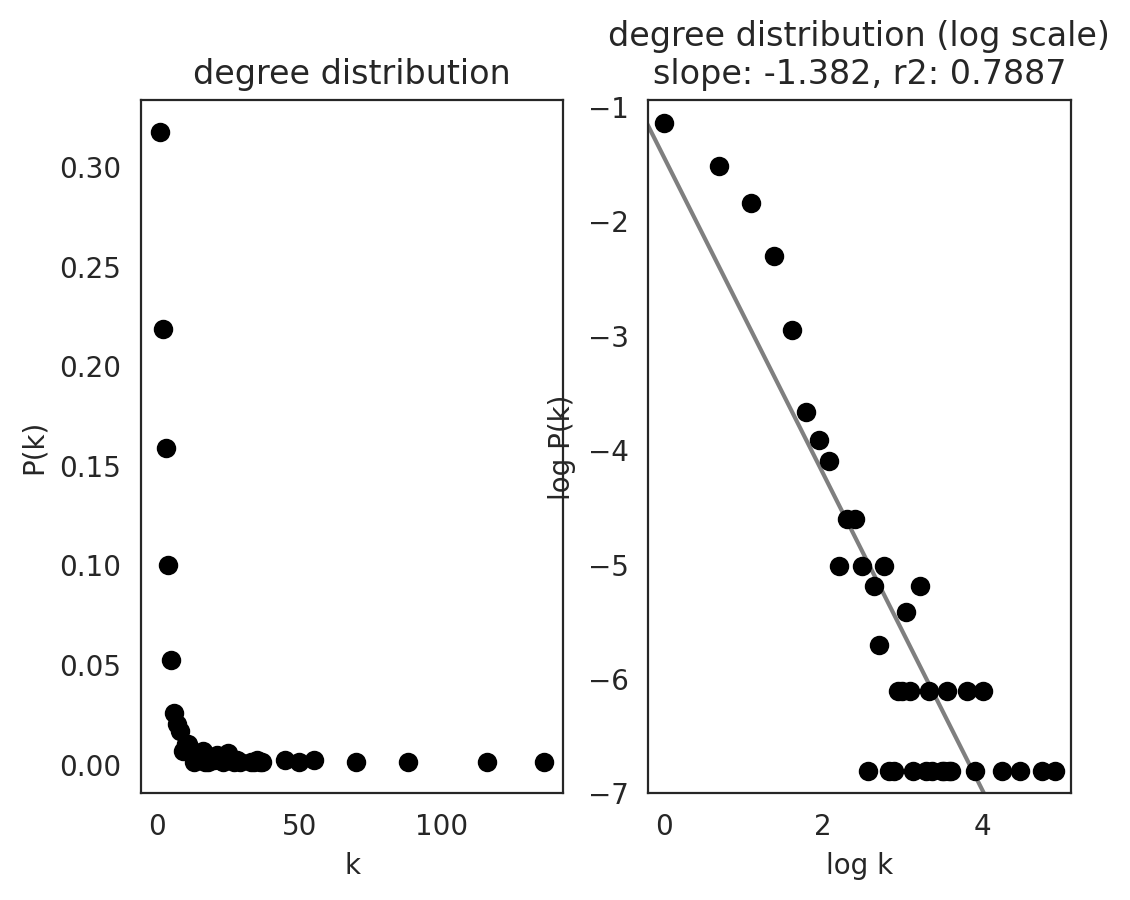

Reprogramming PGCs


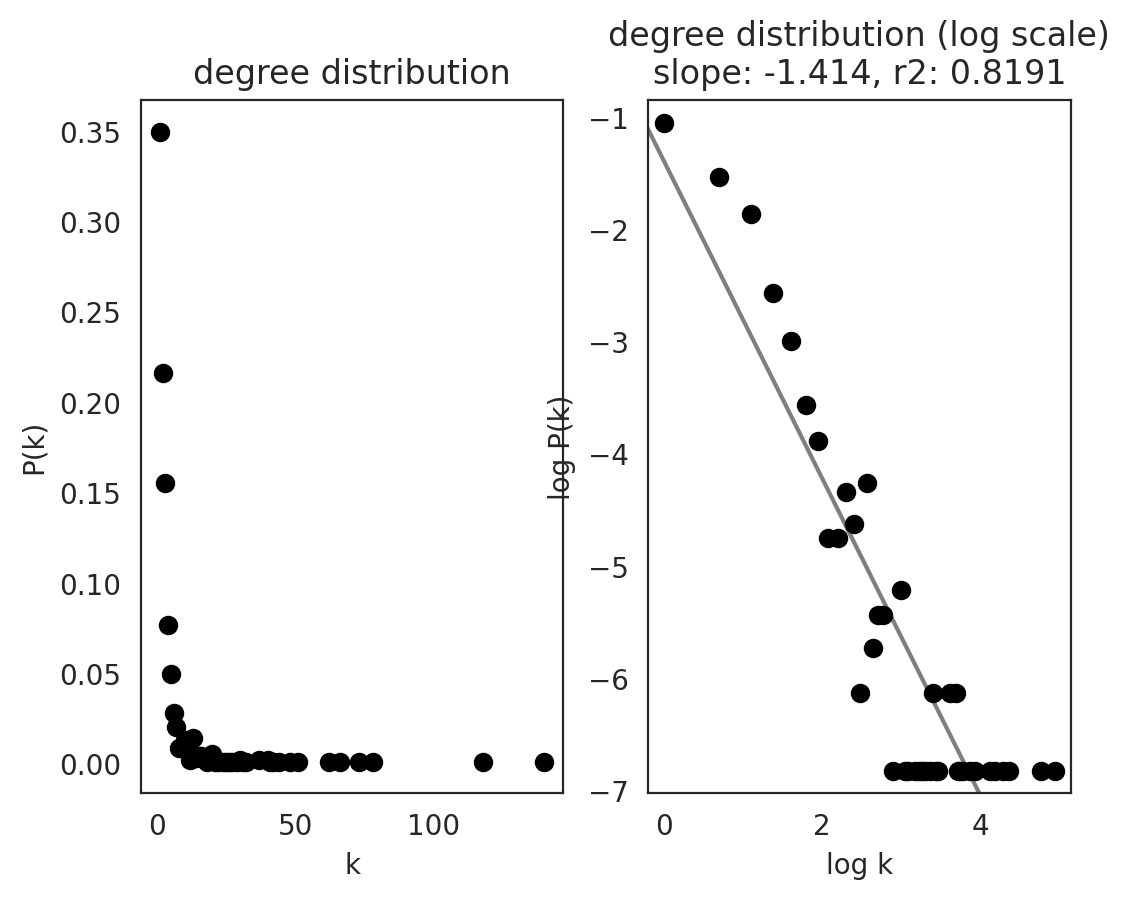

Roof Plate Neural Tube


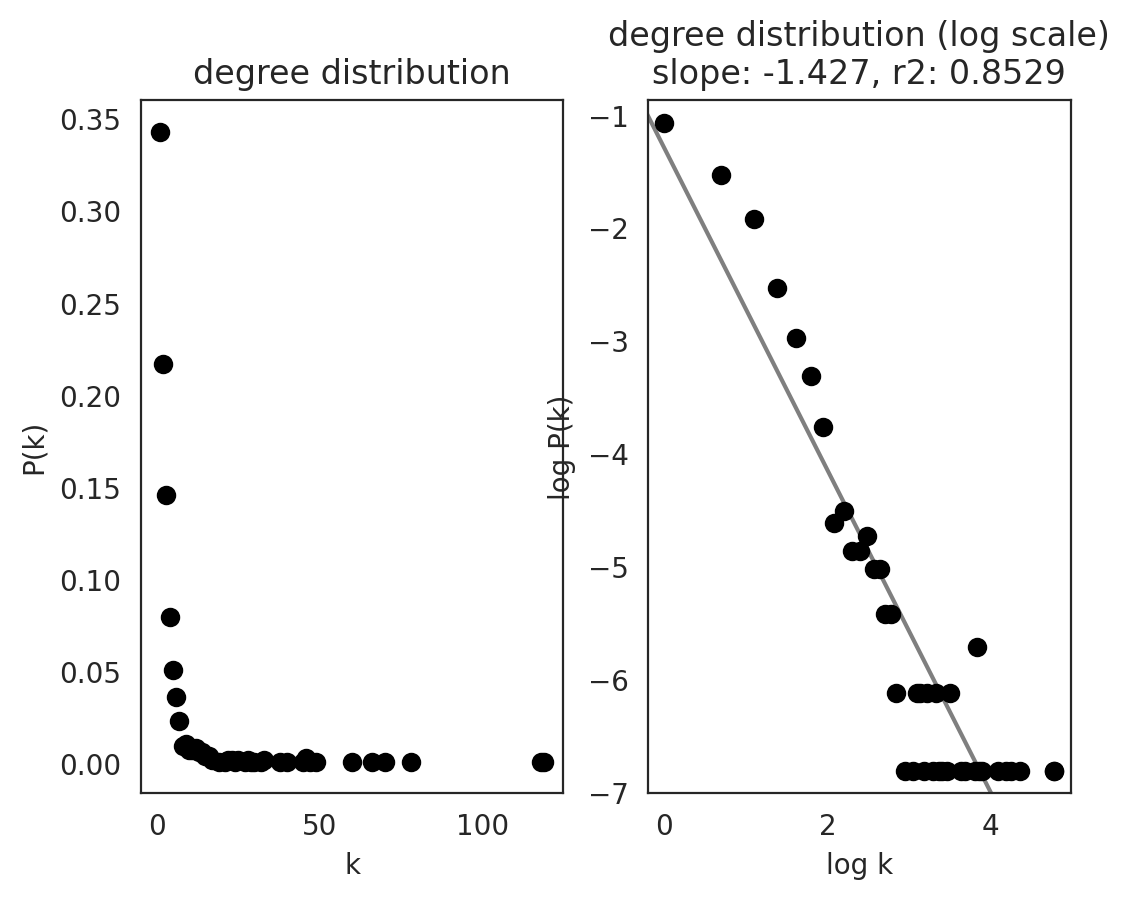

Sclerotome


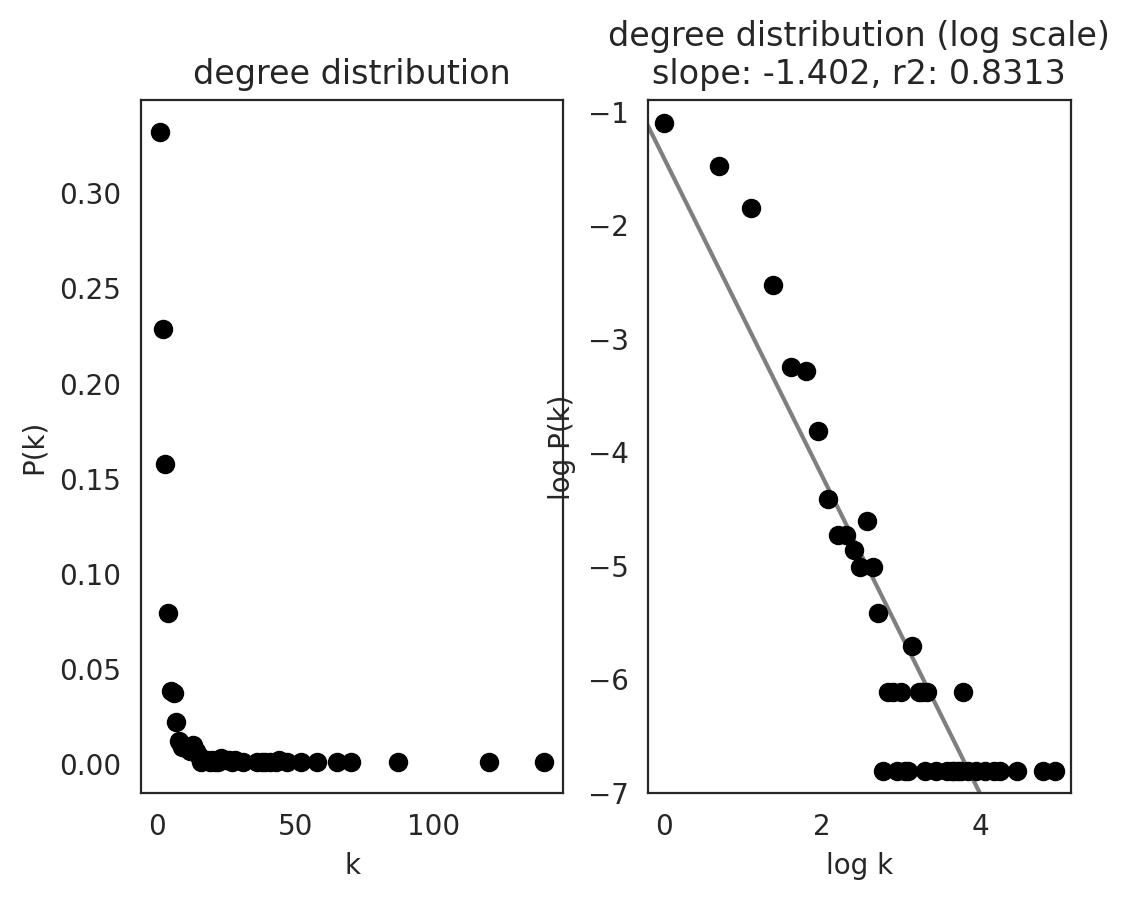

Visceral Endoderm


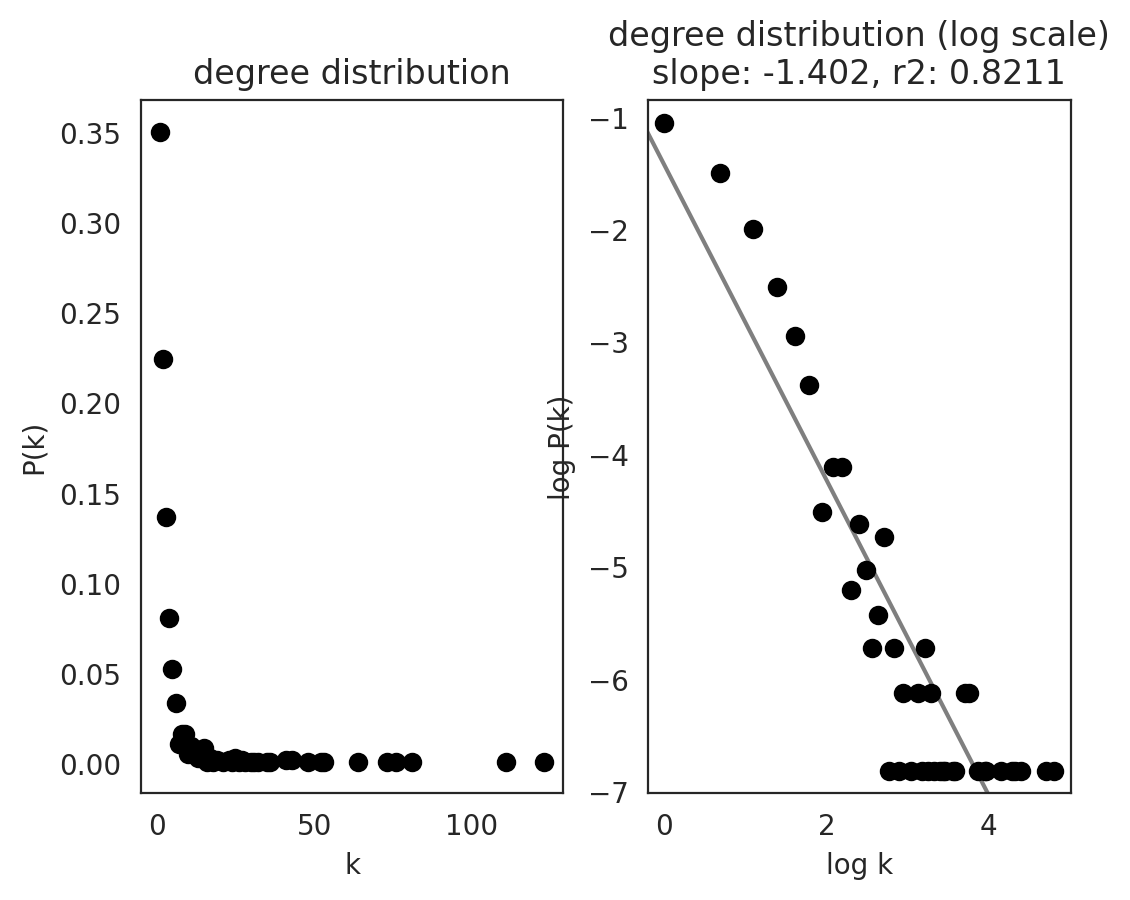

mESCs


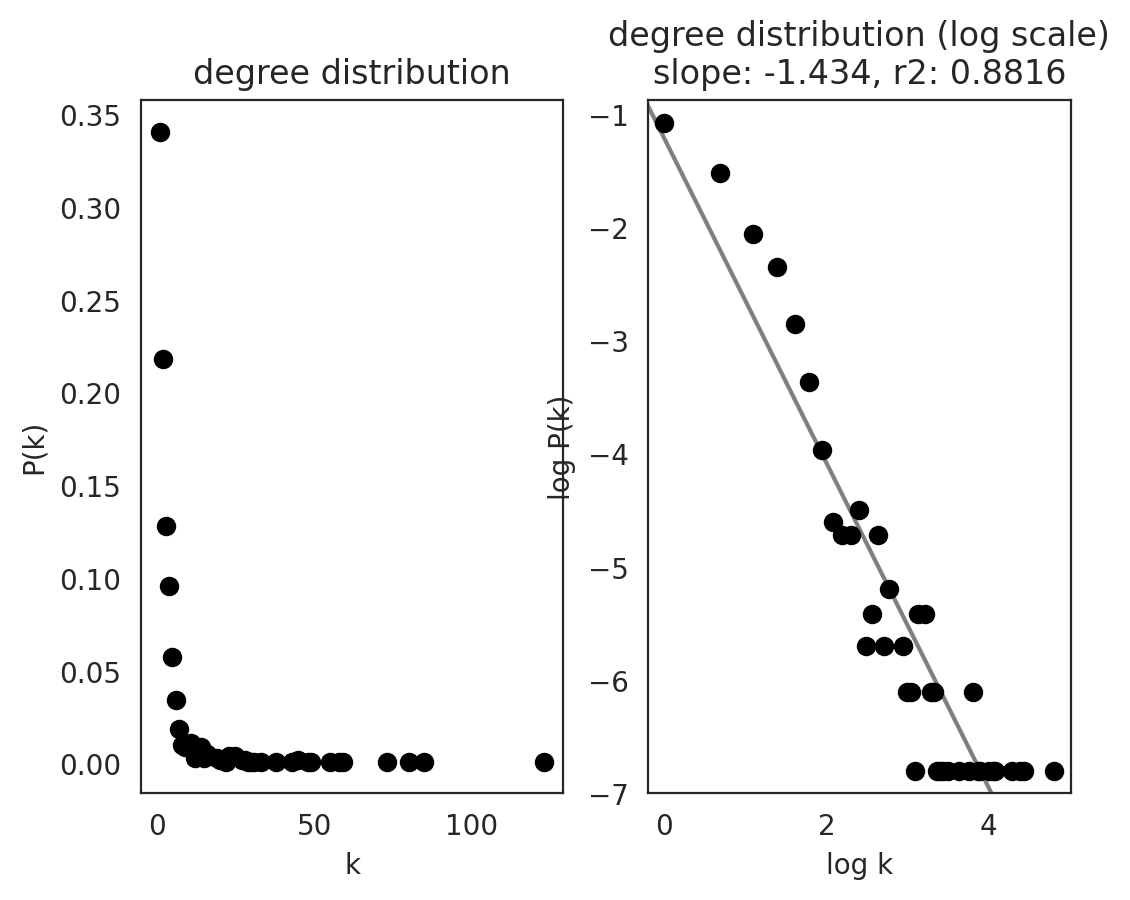

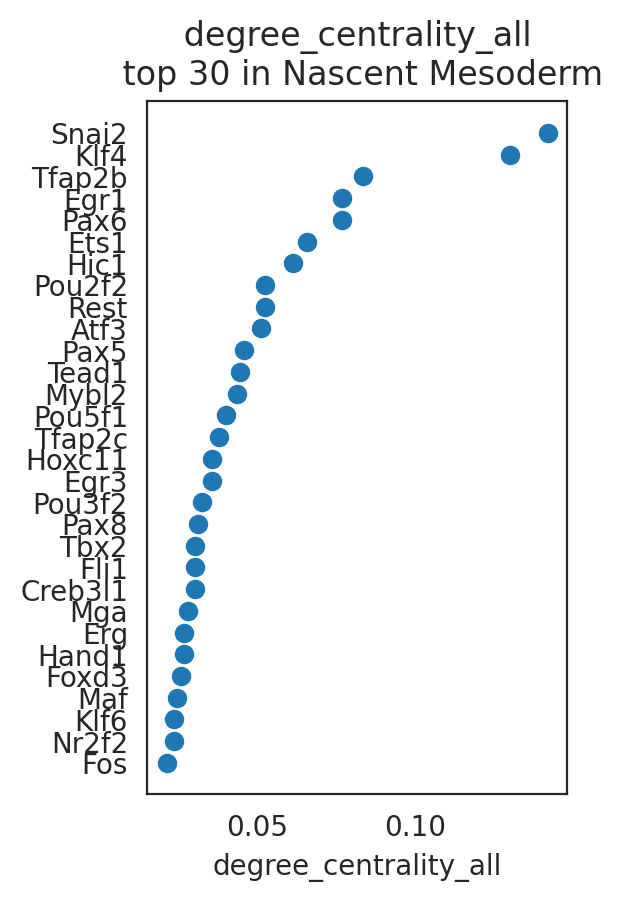

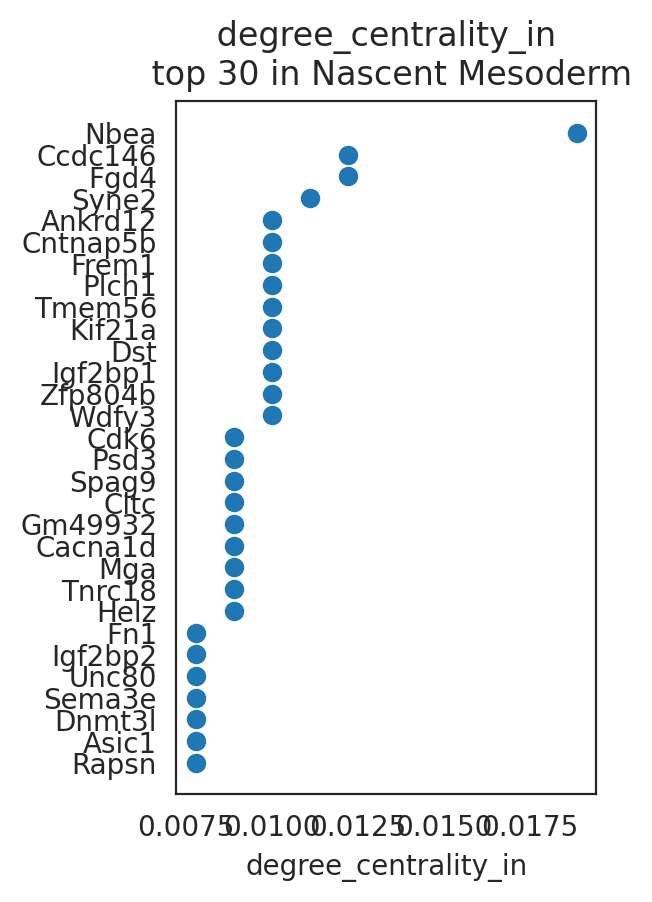

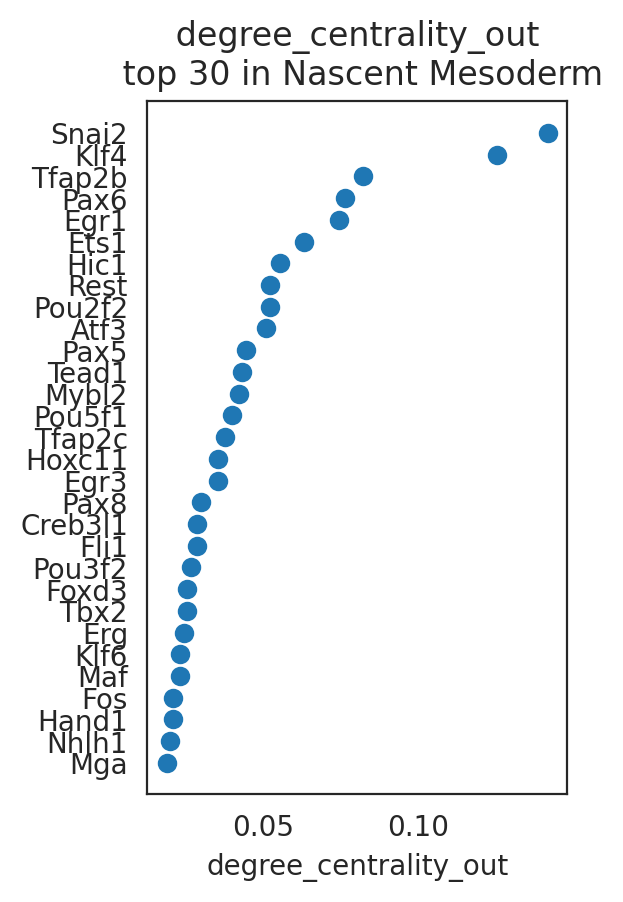

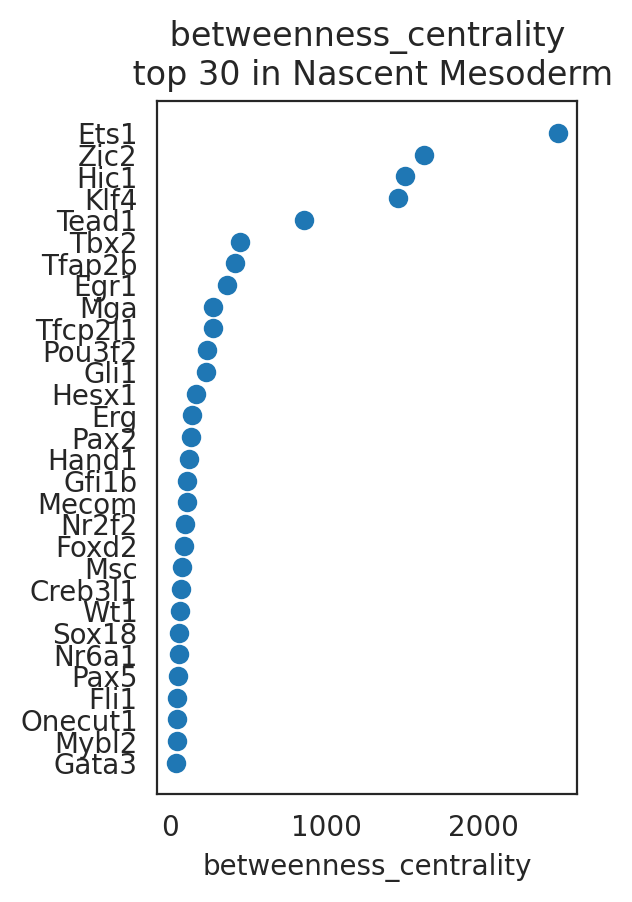

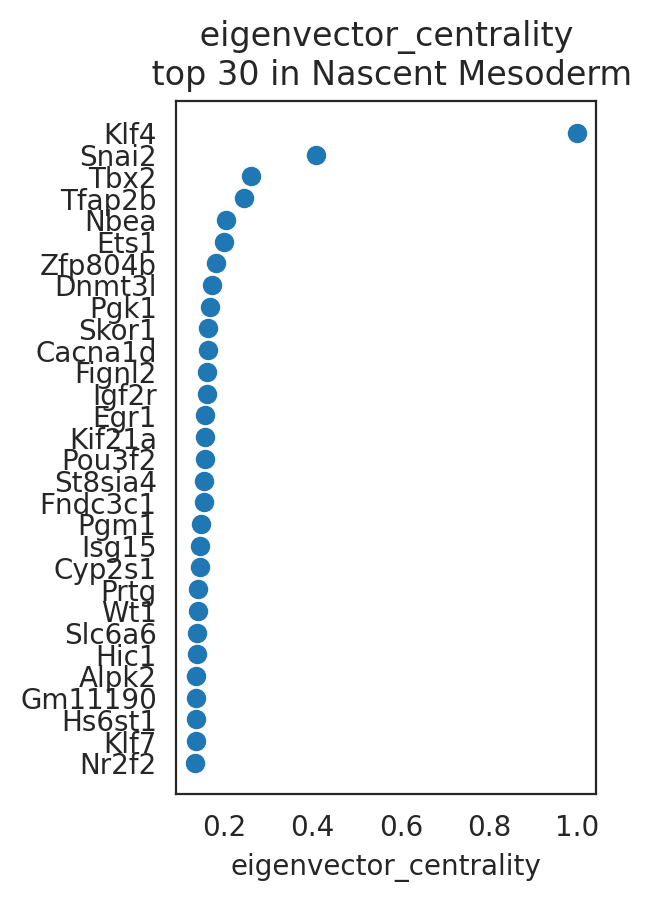

Score ranked start


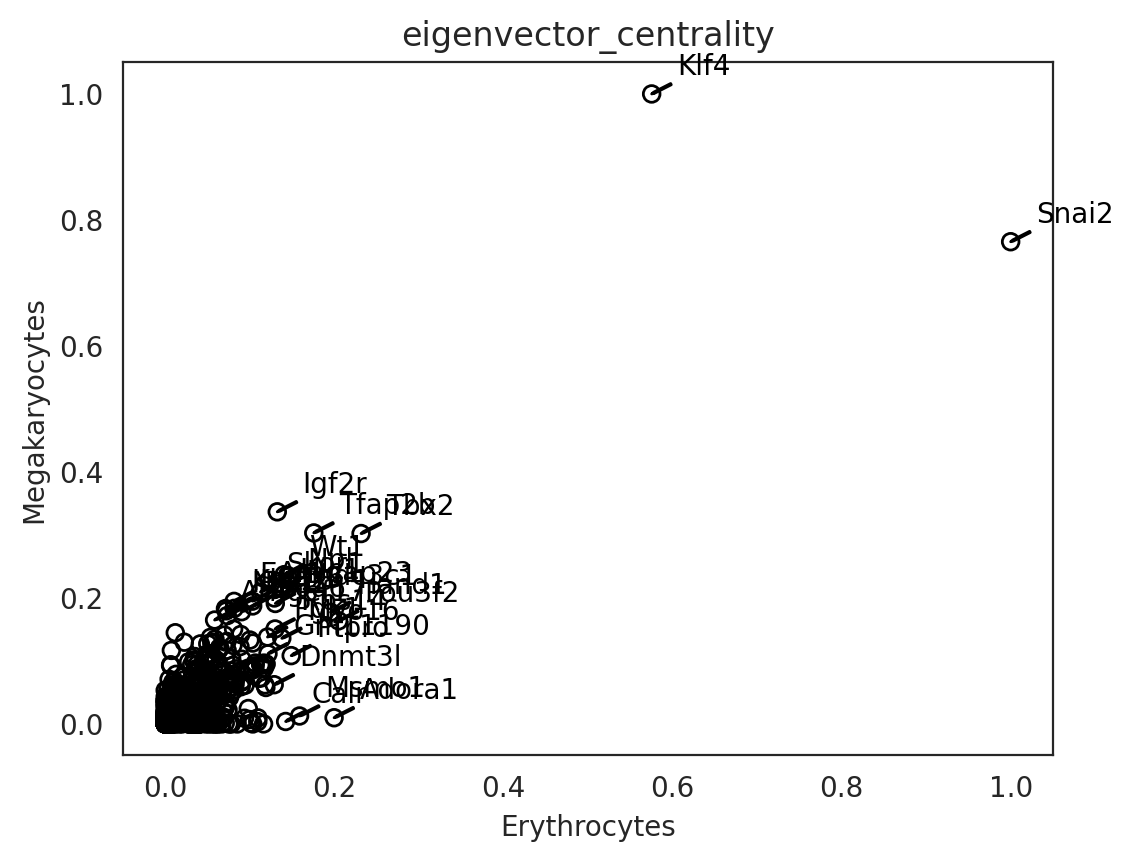

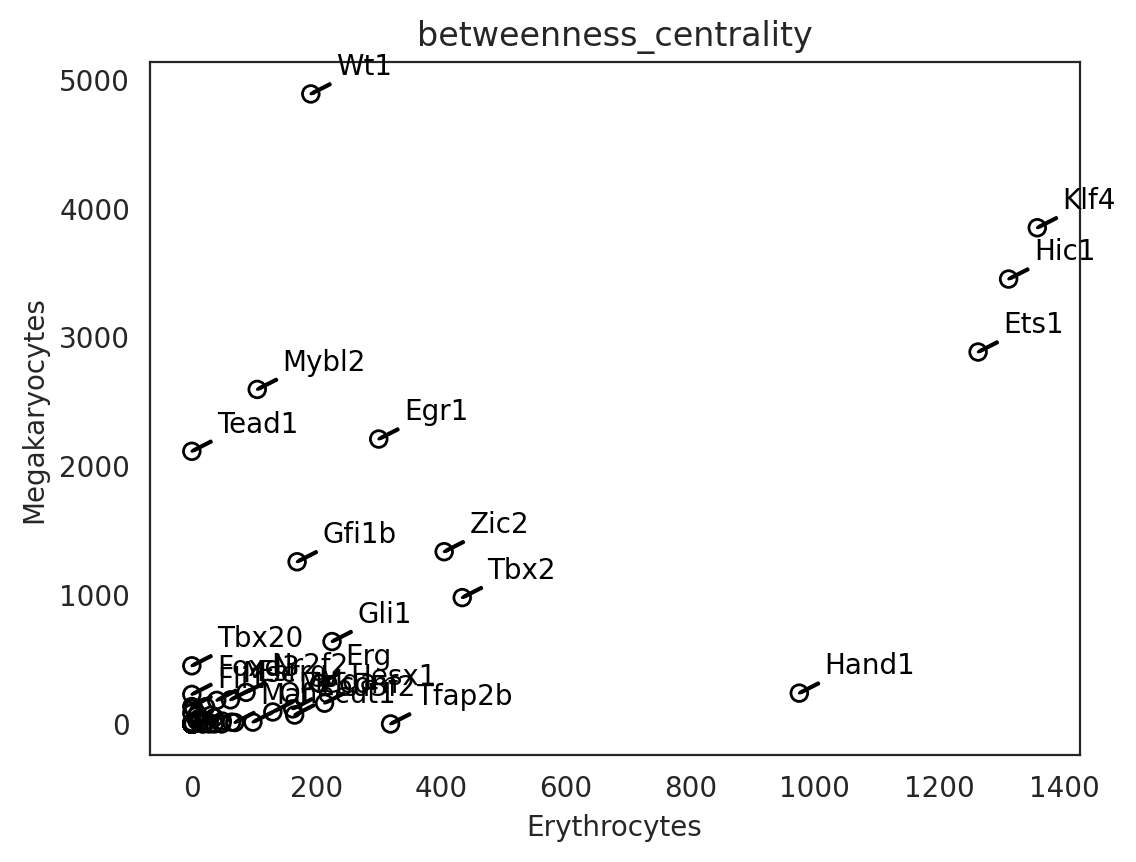

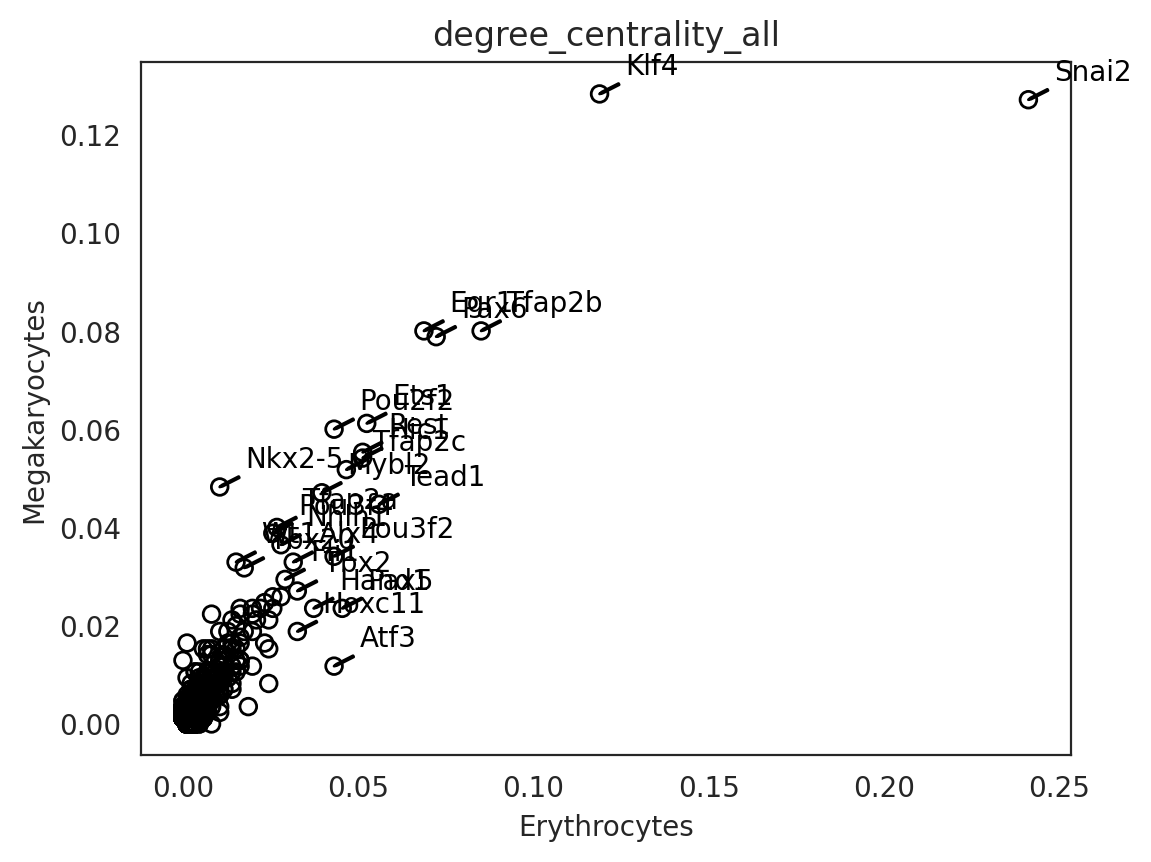

Score comparison done
Gata1


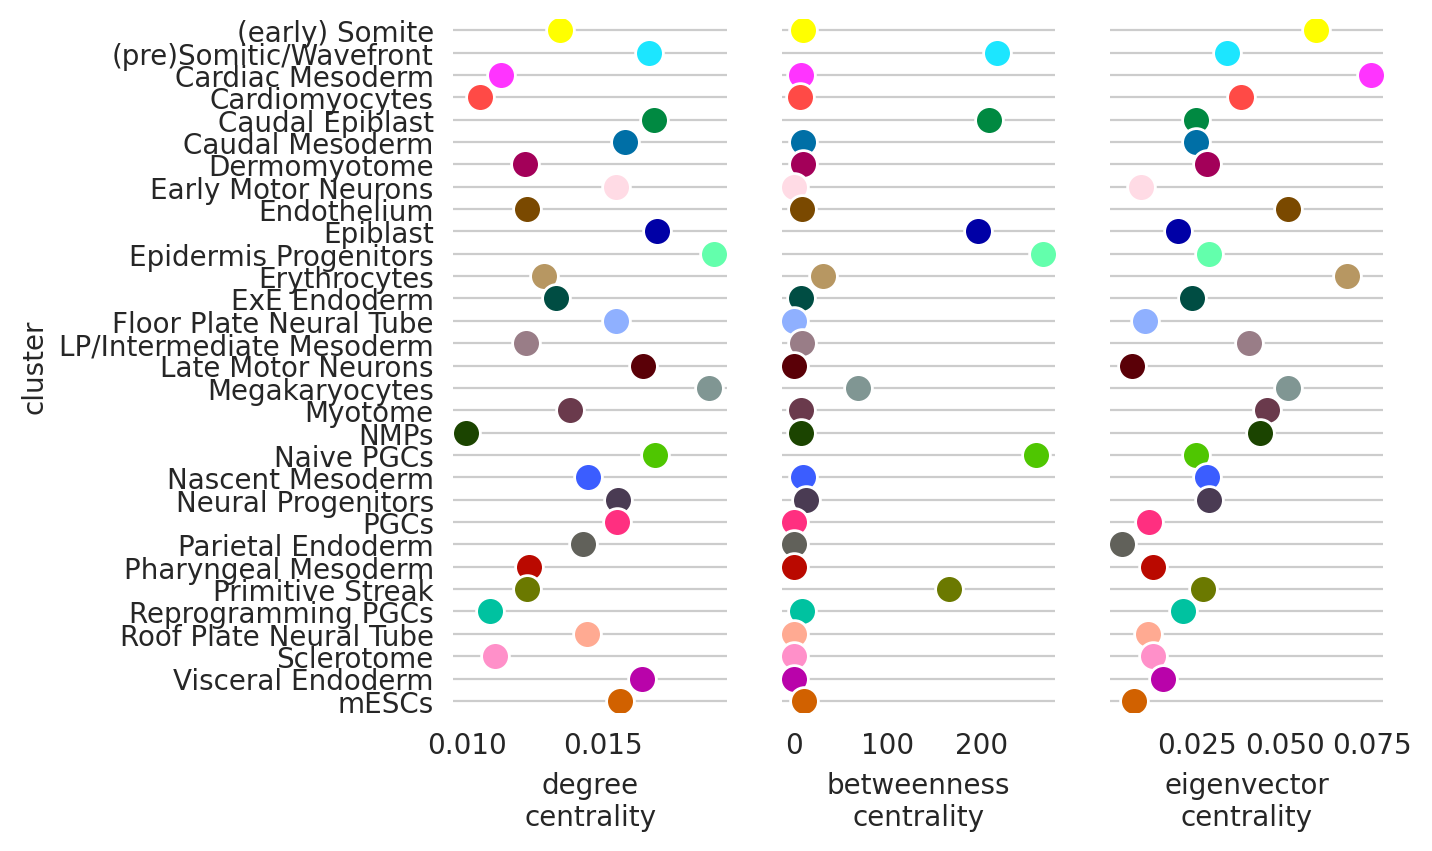

Runx1


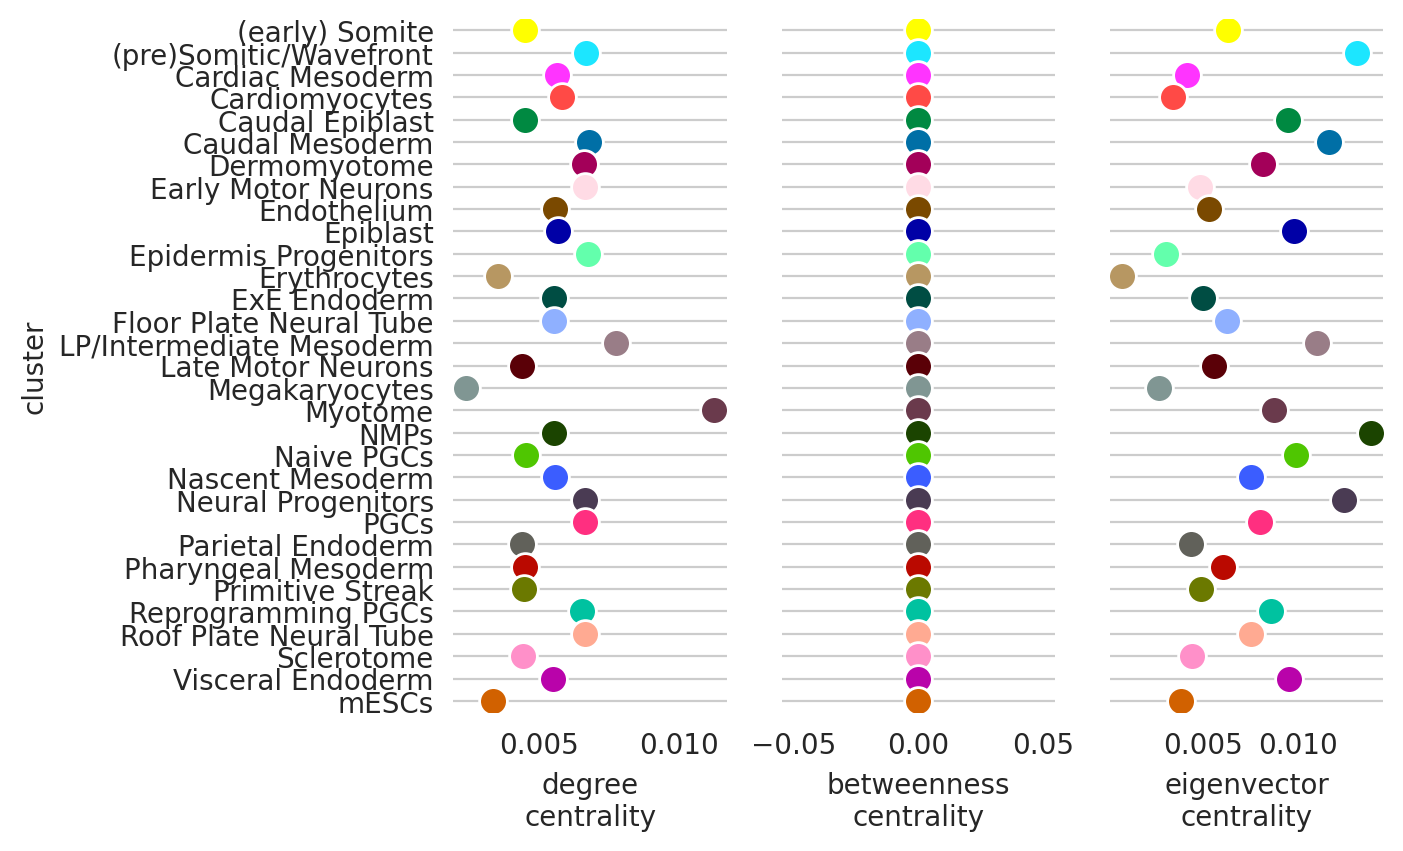

2025-01-29 14:57:34,666 - INFO -         source         target  coef_mean  coef_abs             p      -logp
13725     Klf4          Igf2r  -0.479368  0.479368  9.894096e-20  19.004624
1430     Snai2         Adora1   0.433238  0.433238  6.334208e-14  13.198308
464    Creb3l1  5430434I15Rik   0.379446  0.379446  2.475970e-17  16.606255
11417     Atf3        Gm35097   0.366478  0.366478  5.586407e-21  20.252867
4124     Hand1        Ccdc141   0.343132  0.343132  6.176732e-20  19.209241


degree_centrality_all


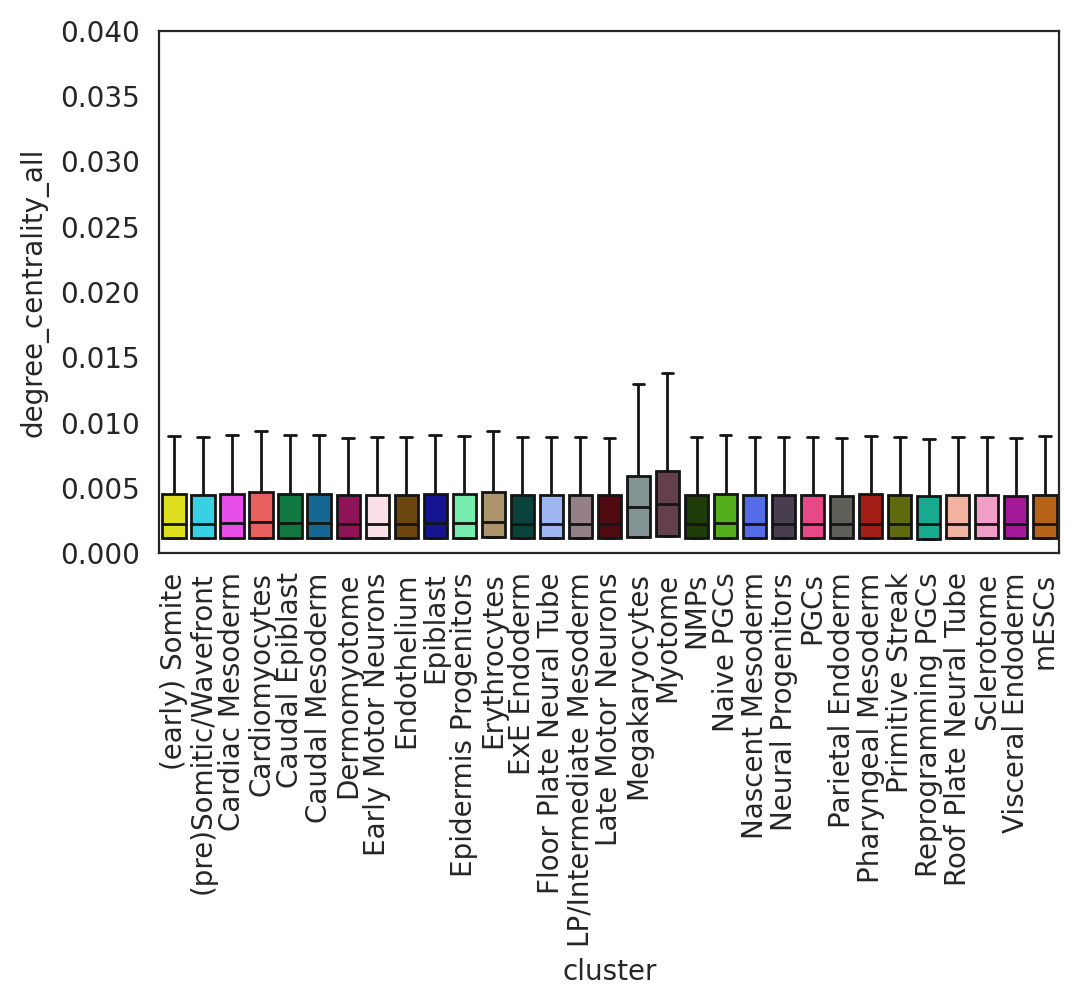

eigenvector_centrality


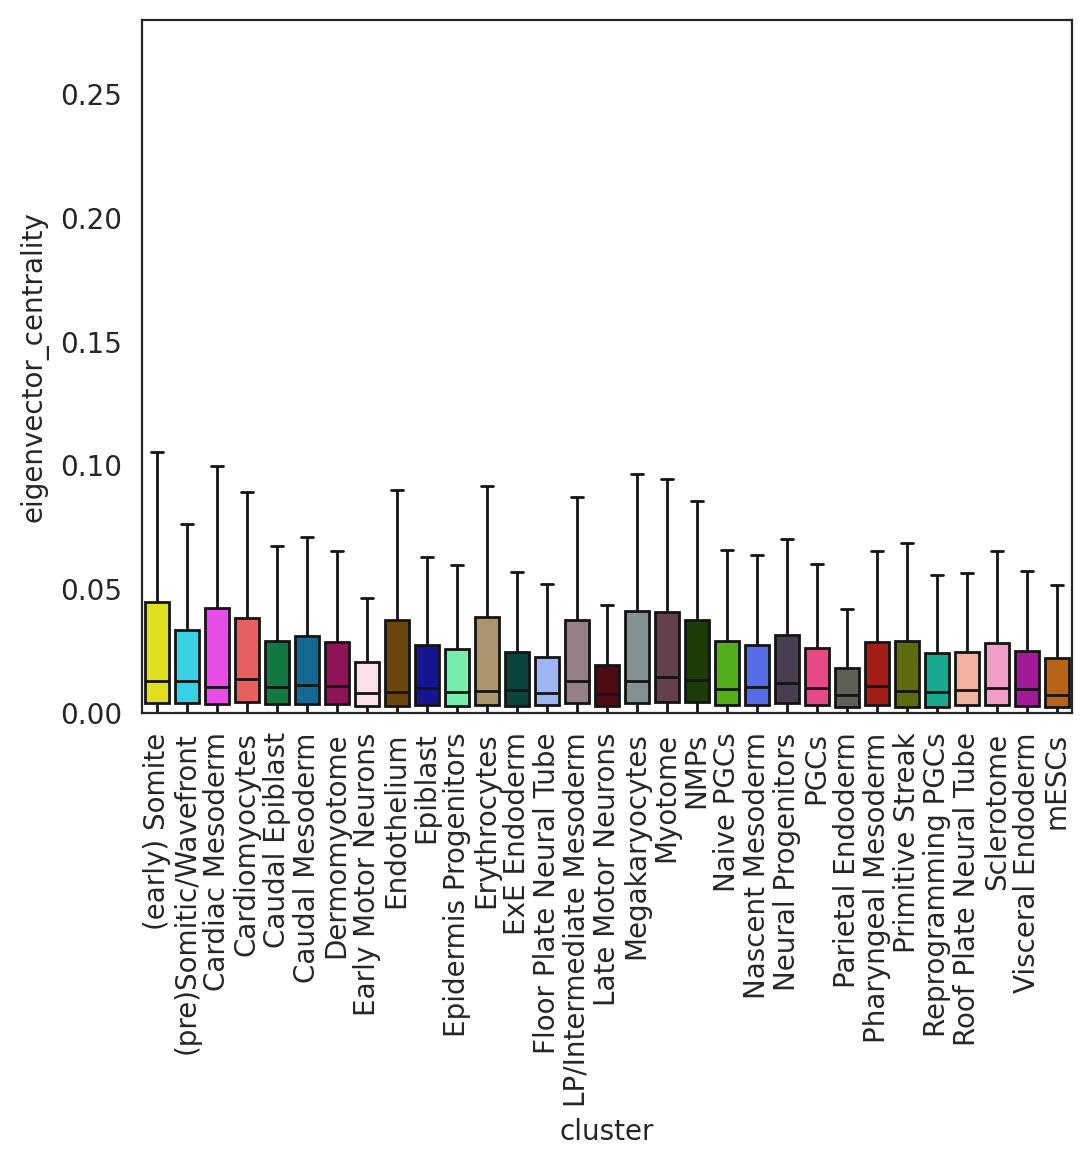

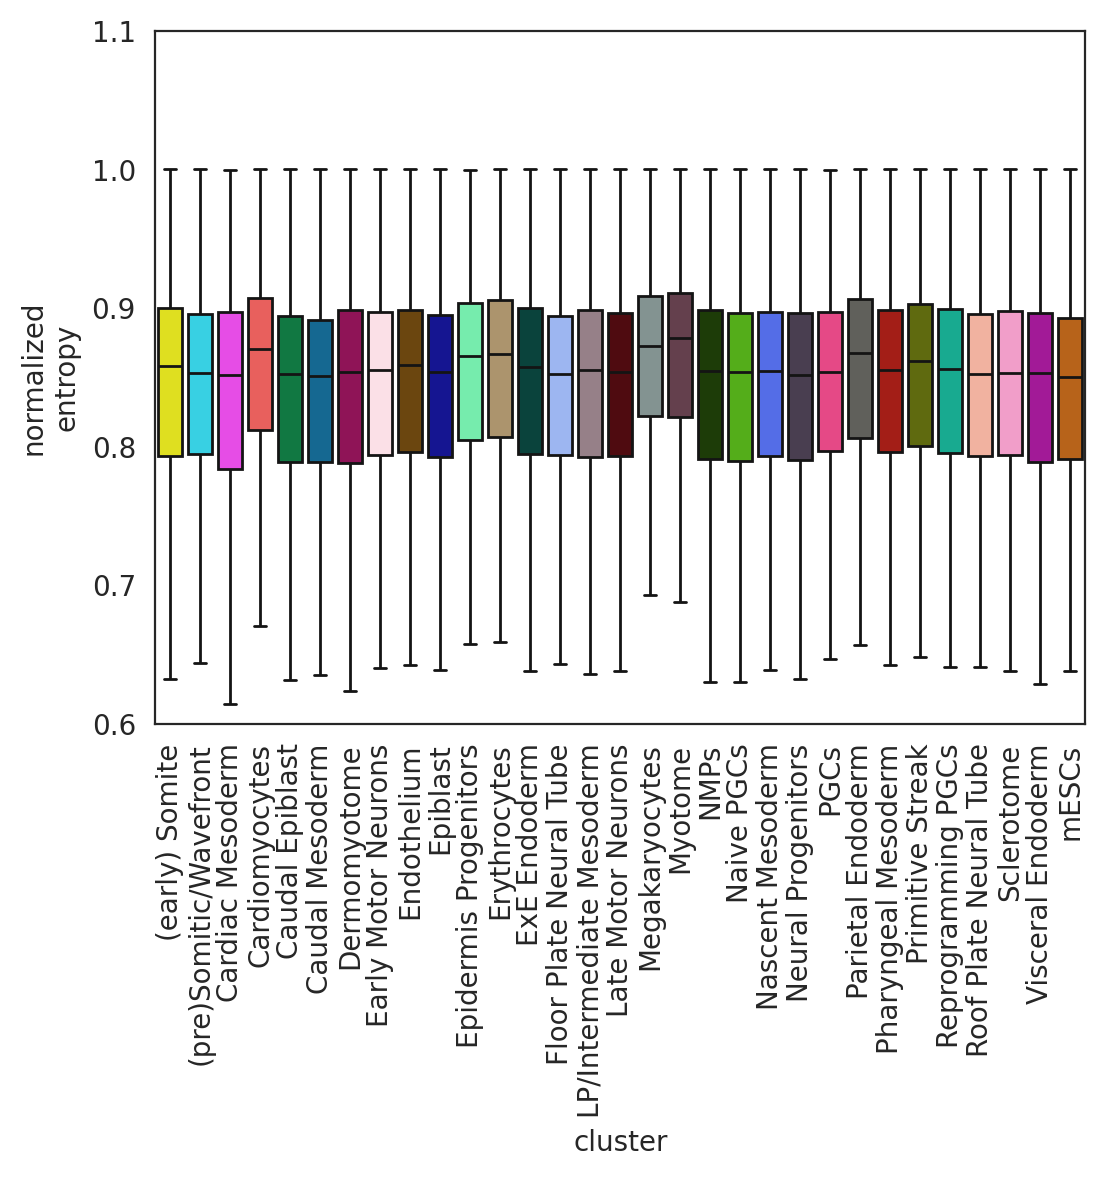

<Figure size 600x450 with 0 Axes>

In [4]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print(trained_links_object.cluster)
analysis_module.Analysis(cellOc_object=trained_cellOc_object, link_object=trained_links_object, plot_dir= os.path.join(Gen_Data_Dir, 'plots'))


In [ ]:
inference = inference_module.Inference(oracle_path=os.path.join(CellOracle_Object_Dir_Prev, "GRN_trained.celloracle.oracle"), links_path=os.path.join(CellOracle_Object_Dir_Prev, "filtered_link.celloracle.links"),fit_for_grn_sim=False)


In [ ]:
inference.perturb(perturb_condition={"Gata1": 0.0}, propagate=3, calc_prob=True)
